# Proyecto 04 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje Illia
### Preparación del Dataset

El modelo correspondorá a pronóstico univariante de series de tiempo : solo dos variables en las que una es el tiempo y la otra es el campo a pronosticar.

In [ ]:
#Importando las librerias basicas y necesarias
import pandas as pd #Libreria de manipulacion de datos
import numpy as np #Libreria numerica muy potente
import matplotlib.pyplot as plt #Libreria para graficos
import seaborn as sns #Libreria para graficos basada en Matplotlib (es mas simple)
import datetime


# IMPORTO LAS LIBRERIAS NECESITARÉ PARA EL MODELO DE MACHINE LEARNING
import pandas as pd
from sklearn.model_selection import train_test_split #Separar conjunto de dataset en valores de entrenamiento
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from google.colab import drive
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
sns.set()


# 1.- Investigación a seguir.


#### Resumen:
**Objetivo:**
Realizar una preddicción del flujo  vehicular de la autopista Illia 2020.

- Descripción del problema:
> Dado el actual contexto de pandemia y la nula historia previa de ello, es que no se cuenta con datos que absorban este acontecimiento por lo que para las predicciones del 2020 me gustaría implementar un modelo de aprendizaje profundo usando redes neuronales para el pronóstico de series de tiempo univariantes expiramentando distintos modelos tales como:
  - Test de Harness (modelo ingenuo)
  - Modelo de Perceptrón Multicapa MLP´s
  - Modelo de red Neuronal convolucional
  - Modelos de redes Neuronales Recurrentes especificamente:
    - LSTM
    - CNN LSTM
    - CONV LSTM

- Resultados Esperados:
> Luego de testear los modelos comentados anteriormente elegir el que arroje mejores metricas e implementarlo para la predicción del año 2020, este debe ser capaz de predecir y absorver la volatilidad del flujo vehicular para el año 2020 considerando el contexto de pandemia.

## Redes Neuronales
Las redes neuronales de aprendizaje profundo son capaces de aprender y extraer características automáticamente de los datos sin procesar.
Esta característica de las redes neuronales se puede utilizar para problemas de predicción de series de tiempo, donde los modelos se pueden desarrollar directamente sobre las observaciones sin procesar sin la necesidad directa de escalar los datos mediante la normalización y estandarización o hacer que los datos sean estacionarios mediante diferenciación.

Los modelos sencillos de redes neuronales de aprendizaje profundo son capaces de realizar pronósticos hábiles en comparación con modelos simples y modelos SARIMA ajustados en problemas de pronóstico de series de tiempo univariantes que tienen componentes de tendencia y estacionales sin procesamiento previo.

Los proximos pasos seran:
- Desarrollar un test harness robusto mediante walk-forward validation (validación de avance) para evaluar el rendimiento de los modelos de redes neuronales.
- Desarrollar y evaluar Perceptron multicapa simple y redes neuronales convolucionales para el pronóstico de series de tiempo.
- Desarrollar y evaluar el modelo de redes neuronales LSTM, CNN-LSTM y ConvLSTM para el pronóstico de series de tiempo.

Todo esto con el foco de pronosticar el año 2020.


In [ ]:
#Importando las librerias basicas y necesarias
import pandas as pd #Libreria de manipulacion de datos
import numpy as np #Libreria numerica muy potente
import matplotlib.pyplot as plt #Libreria para graficos
import seaborn as sns #Libreria para graficos basada en Matplotlib (es mas simple)
import datetime


# IMPORTO LAS LIBRERIAS NECESITARÉ PARA EL MODELO DE MACHINE LEARNING
import pandas as pd
from sklearn.model_selection import train_test_split #Separar conjunto de dataset en valores de entrenamiento
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from google.colab import drive
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
sns.set()


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
data_2020 = pd.read_csv("/content/gdrive/MyDrive/Colab_Notebooks/PROYECTO_4/flujo-vehicular-2020.csv", sep =',')
data_2019 = pd.read_csv("/content/gdrive/MyDrive/Colab_Notebooks/PROYECTO_4/flujo-vehicular-2019.csv", sep =',')
data_2018 = pd.read_csv('/content/gdrive/MyDrive/Colab_Notebooks/PROYECTO_4/flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('/content/gdrive/MyDrive/Colab_Notebooks/PROYECTO_4/flujo-vehicular-2017.csv', sep =',')

#print("Columnas 2020", data_2020.columns)
print("Variables de la Columna Estación - 2020", data_2020['estacion'].unique())
print("Variables de la Columna Estación - 2019", data_2019['estacion'].unique())
print("Variables de la Columna Estación - 2018", data_2018['estacion'].unique())
print("Variables de la Columna Estación - 2017", data_2017['estacion'].unique())

Variables de la Columna Estación - 2020 ['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']
Variables de la Columna Estación - 2019 ['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
Variables de la Columna Estación - 2018 ['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
Variables de la Columna Estación - 2017 ['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [ ]:
#Filtramos los Dataset por estación Illia
filtro = (data_2020["estacion"] == "ILLIA")
data_2020 = data_2020[filtro]
filtro = (data_2019["estacion"] == "Illia")
data_2019 = data_2019[filtro]
filtro = (data_2018["estacion"] == "Illia")
data_2018 = data_2018[filtro]
filtro = (data_2017["estacion"] == "Illia")
data_2017 = data_2017[filtro]

#Unimos los 4 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2020, data_2019, data_2018, data_2017])
print("Unimos los 3 datasets",dataset.shape)
dataset

Unimos los 3 datasets (1048605, 13)


periodo                fecha  ...    sentido cantidad_pasos
52        2020.0  2020-01-01 00:00:00  ...     Centro          326.0
53        2020.0  2020-01-01 00:00:00  ...  Provincia          319.0
54        2020.0  2020-01-01 00:00:00  ...     Centro            2.0
55        2020.0  2020-01-01 00:00:00  ...  Provincia            1.0
56        2020.0  2020-01-01 00:00:00  ...     Centro            4.0
...          ...                  ...  ...        ...            ...
1372324   2017.0           2017-12-31  ...  Provincia            1.0
1372325   2017.0           2017-12-31  ...  Provincia            2.0
1372326   2017.0           2017-12-31  ...  Provincia            1.0
1372327   2017.0           2017-12-31  ...  Provincia           99.0
1372328   2017.0           2017-12-31  ...  Provincia           25.0

[1048605 rows x 13 columns]

In [ ]:
#Nos quedamos solamente con la estación Illia
print("Nos quedamos solamente con la estación Illia",dataset.shape)

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio', 'estacion'], inplace = True)
print("Quitamos las columnas que no vamos a utilizar",dataset.shape)

#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha',"dia_fecha",'hora_fin'], inplace = True)


#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 

#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)

#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
series = dataset.resample('D', on = 'fecha').sum()
print("Revisando el Resample por día de Series ",series.shape)
series = pd.DataFrame(series)

#Reviso el total de valores faltantes NaN del dataset :
print("Los valores nulos del dataset son: ", series.isna().sum())
#Si no se utiliza el sum() va a devolver la condicion True o False de los campos


Nos quedamos solamente con la estación Illia (1048605, 13)
Quitamos las columnas que no vamos a utilizar (1048605, 10)
Revisando el Resample por día de Series  (1461, 1)
Los valores nulos del dataset son:  cantidad_pasos    0
dtype: int64


- Detección de Outliers: Esto debo revisarlo en mayor detalle para el proyecto 4 ya que haré la detección de outliers por año, pues se ha demostrad en el presente trabajo que los valores varian tendencialmente por año.

In [ ]:
"""
# Reviso un BoxPlot de la cantidad de pasos para sacar los Outliers
plt.figure(figsize = (15, 5))
sns.boxplot( x = 'cantidad_pasos',  data = series)
plt.title("INICIAL: VARIABLE CANTIDAD DE PASOS", pad=10, fontsize=20,fontweight="bold")
xt = plt.xticks(rotation=90)
print("Cantidad de instancias que tiene el Dataset antes de la eliminación de Outliers", series.shape)

valor_medio = series.cantidad_pasos.mean()
std = series.cantidad_pasos.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers = np.logical_or(series.cantidad_pasos < minimo, series.cantidad_pasos > maximo)
print("El número de outliers detectados es ",mascara_outliers.sum())
print("El Valor máximo es ", maximo)
print("El Valor mínimo es ", minimo)

#Sacando los Outliers
mascara = series["cantidad_pasos"]<maximo
series=series[mascara]
mascara = series["cantidad_pasos"]>minimo
series=series[mascara]

plt.figure(figsize = (15, 5))
sns.boxplot( x = 'cantidad_pasos',  data = series)
plt.title("FINAL: VARIABLE CANTIDAD DE PASOS", pad=10, fontsize=20,fontweight="bold")
xt = plt.xticks(rotation=90)
print("Cantidad de instancias que tiene el Dataset después de la eliminación de Outliers", series.shape)

#Paso a Data Frame
series = pd.DataFrame(series)
series
"""

'\n# Reviso un BoxPlot de la cantidad de pasos para sacar los Outliers\nplt.figure(figsize = (15, 5))\nsns.boxplot( x = \'cantidad_pasos\',  data = series)\nplt.title("INICIAL: VARIABLE CANTIDAD DE PASOS", pad=10, fontsize=20,fontweight="bold")\nxt = plt.xticks(rotation=90)\nprint("Cantidad de instancias que tiene el Dataset antes de la eliminación de Outliers", series.shape)\n\nvalor_medio = series.cantidad_pasos.mean()\nstd = series.cantidad_pasos.std()\nminimo = valor_medio - 3*std\nmaximo = valor_medio + 3*std\nmascara_outliers = np.logical_or(series.cantidad_pasos < minimo, series.cantidad_pasos > maximo)\nprint("El número de outliers detectados es ",mascara_outliers.sum())\nprint("El Valor máximo es ", maximo)\nprint("El Valor mínimo es ", minimo)\n\n#Sacando los Outliers\nmascara = series["cantidad_pasos"]<maximo\nseries=series[mascara]\nmascara = series["cantidad_pasos"]>minimo\nseries=series[mascara]\n\nplt.figure(figsize = (15, 5))\nsns.boxplot( x = \'cantidad_pasos\',  data 

(1461, 1)


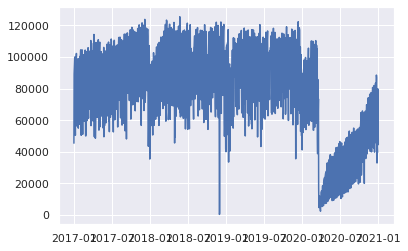

In [ ]:
from matplotlib import pyplot
# summarize shape
print(series.shape)
# plot
pyplot.plot(series)
pyplot.show()

Se crea un gráfico de líneas. El conjunto de datos tiene un quiebre obvio y un componente estacional. El período del componente estacional podría ser de un año.

El conjunto de datos es diario y tiene cuatro años o 1461 observaciones. Para las pruebas, Utilizaré el último semestre, o 182 observaciones (6 meses)como conjunto de pruebas.

A partir de experimentos anteriores, sabemos que un modelo simple puede lograr una raíz del error cuadrático medio, o RMSE, de 2206 tomando la mediana de las observaciones en los tres años anteriores para el mes que se predice.

Donde los índices negativos se refieren a observaciones en la serie relativas al final de los datos históricos para el mes que se predice.

De experimentos anteriores, sabemos que un modelo SARIMA puede lograr un RMSE de 7246.747 con la configuración de 
-   > Model SARIMA [ [ ( 0 , 0 , 0 ) , ( 2 , 0 , 2 , 6) , 'ct' ] ]   

Donde no se especifican elementos para la tendencia y una diferencia estacional. con un período de 12 se calcula y se utiliza un modelo AR de una temporada.

El rendimiento del modelo sencillo proporciona un límite inferior en un modelo que se considera hábil. Cualquier modelo que logre un rendimiento predictivo inferior a 7246.747 en los últimos meses tiene habilidad.

El rendimiento del modelo SARIMA proporciona una medida de un buen modelo sobre el problema. Cualquier modelo que logre un rendimiento predictivo inferior a 7246.747 en los últimos meses debe adoptarse sobre un modelo SARIMA.

Ahora que hemos definido nuestro problema y expectativas de la habilidad del modelo, podemos considerar la definición del est Harness (arnés de prueba).

# 2.- Creación del Modelo Test Harness

Esta sección se divide en las siguientes partes:

- 1.- División de tren-prueba.
- 2.- Series de aprendizaje supervisado.
- 3.- Validación progresiva.
- 4.- Repetir evaluación.
- 5.- Resumir el rendimiento.

### 1.- División de tren-prueba.

El primer paso es dividir la serie en train y test.
Usaremos los primeros 3 años y medio (1276 observaciones) para el entrenamiento y los últimos 6 meses para el conjunto de prueba (1276 observaciones).

#### Def train_test_split

In [ ]:
"""
La función train_test_split () a continuación dividirá la serie tomando las observaciones 
sin procesar y el número de observaciones para usar en el conjunto de prueba como argumentos.
"""
# Dividir un conjunto de datos univariante en conjuntos de train / test
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

### 2.- Series de aprendizaje supervisado.

A continuación, necesitamos poder enmarcar la serie univariante de observaciones como un problema de aprendizaje supervisado para que podamos entrenar modelos de redes neuronales.

Un encuadre de aprendizaje supervisado de una serie significa que los datos deben dividirse en varios ejemplos de los que el modelo aprende y generaliza.

Cada muestra debe tener un componente de entrada y un componente de salida.

El componente de entrada será una serie de observaciones previas, como tres años o 1095 pasos de tiempo.

El componente de salida serán la "cantidad_pasos" totales en el próximo día que es porque estamos interesados ​​en desarrollar un modelo para hacer pronósticos de un solo paso.

Podemos implementar esto usando la función shift () en el DataFrame de pandas. Nos permite desplazar una columna hacia abajo (hacia adelante en el tiempo) o hacia atrás (hacia atrás en el tiempo). Podemos tomar la serie como una columna de datos, luego crear múltiples copias de la columna, desplazadas hacia adelante o hacia atrás en el tiempo para crear las muestras con los elementos de entrada y salida que necesitamos.

Cuando una serie se desplaza hacia abajo, se introducen valores de NaN porque no tenemos valores más allá del inicio de la serie.

#### Def Series_to_supervised

In [ ]:
"""
La función series_to_supervised () a continuación implementa este comportamiento, lo que le permite especificar 
el número de observaciones de retraso para usar en la entrada y el número para usar en la salida para cada muestra. 
También eliminará las filas que tengan valores NaN, ya que no se pueden usar para entrenar o probar un modelo.
"""
# Transformar la lista en formato de aprendizaje supervisado
def series_to_supervised(data, n_in=1, n_out=1):
	df = DataFrame(data)#Paso la data a DataFrame
	cols = list()#Creo una lista
	# Secuencia de entrada (t-n, ... t-1)
	for i in range(n_in, 0, -1):# Desde i en rango n, 0 y -1
		cols.append(df.shift(i))#Guardo en la lista los valores del DF shift en el rango declarado anteriormente
	# Secuencia de Pronostico (t, t+1, ... t+n)
	for i in range(0, n_out):# For de i en range de 0, y numero de salida.
		cols.append(df.shift(-i))#Guardo en la lista los valores del DF shift en el rango negativo declarado anteriormente
	# Juntando..
	agg = concat(cols, axis=1)
	# Borrando las filas con valores NaN
	agg.dropna(inplace=True)
	return agg.values

### 3.- Validación progresiva.

Los modelos de predicción de series de tiempo se pueden evaluar en un conjunto de prueba mediante la validación de avance.

La validación de avance es un enfoque en el que el modelo hace un pronóstico para cada observación en el conjunto de datos de prueba, una por una. Después de que se realiza cada pronóstico para un paso de tiempo en el conjunto de datos de prueba, la observación verdadera para el pronóstico se agrega al conjunto de datos de prueba y se pone a disposición del modelo.

Los modelos más simples se pueden reajustar con la observación antes de realizar la predicción posterior. Los modelos más complejos, como las redes neuronales, no se reajustan debido al costo computacional mucho mayor.

No obstante, la observación real del paso de tiempo se puede utilizar como parte de la entrada para realizar la predicción del siguiente paso de tiempo. 

Primero, el conjunto de datos se divide en conjuntos de prueba y de tren. Llamaremos al train_test_split () función para realizar esta división y pasar el número preespecificado de observaciones para usar como datos de prueba. Un modelo se ajustará una vez al conjunto de datos de entrenamiento para una configuración determinada.



In [ ]:
"""
Definiremos una función model_fit () genérica para realizar esta operación que se puede completar para el tipo
dado de red neuronal que nos puede servirá más adelante. La función toma el conjunto de datos de entrenamiento
y la configuración del modelo y devuelve el modelo de ajuste listo para realizar predicciones.
"""
# Entrenar el modelo
def model_fit(train, config):
	return None

In [ ]:
"""
Se enumera cada paso de tiempo del conjunto de datos de prueba. Se hace una predicción utilizando el modelo de ajuste.
Nuevamente, definiremos una función genérica llamada model_predict () que toma el modelo de ajuste, el historial 
y la configuración del modelo y hace una predicción de un solo paso.
"""

# Pronóstico con un modelo pre-ajustado
def model_predict(model, history, config):
	return 0.0

La predicción se agrega a una lista de predicciones y la observación verdadera del conjunto de prueba se agrega a una lista de observaciones que se sembró con todas las observaciones del conjunto de datos de entrenamiento. Esta lista se crea durante cada paso de la validación de avance, lo que permite que el modelo haga una predicción de un paso utilizando el historial más reciente.

Todas las predicciones se pueden comparar con los valores reales en el conjunto de prueba y se puede calcular una medida de error.

Calcularemos la raíz del error cuadrático medio, o RMSE, entre las predicciones y los valores reales.

#### Def measure_rmse

In [ ]:
"""
El RMSE se calcula como la raíz cuadrada del promedio de las diferencias al cuadrado entre los pronósticos 
y los valores reales. La medida_rmse () implementa esto a continuación usando la función 
mean_squared_error () scikit-learn para calcular primero el error cuadrático medio, o MSE,
antes de calcular la raíz cuadrada.
"""
# Raíz cuadrada media error de Rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))

#### Def difference

In [ ]:
# Conjunto de datos de diferencia
def difference(data, interval):
	return [data[i] - data[i - interval] for i in range(interval, len(data))]


#### Def walk_forward_validation

In [ ]:
"""
La  función walk_forward_validation () completa que une todo esto se enumera a continuación.
Toma el conjunto de datos, el número de observaciones que se utilizarán como conjunto de prueba
y la configuración del modelo, posteriormente devuelve el RMSE para el rendimiento del modelo 
en el conjunto de prueba.
"""
# Validación de avance para datos univariados
def walk_forward_validation(data, n_test, cfg):
	predictions = list()#creo una lista
	# Separo el dataset
	train, test = train_test_split(data, n_test)
	# Entreno el modelo
	model = model_fit(train, cfg)
	# Semilla history con training dataset
	history = [x for x in train]
	# Pasar por encima de cada paso de tiempo en el conjunto de prueba
	for i in range(len(test)):
		# Entrenar el modelo y hacer un pronostico para la hisoria  
		yhat = model_predict(model, history, cfg)
		# Almacenar el pronóstico en la lista de predicciones
		predictions.append(yhat)
		# Agregando la observación actual al historial para el siguiente ciclo
		history.append(test[i])
	# Estimando la predicción del  error
	error = measure_rmse(test, predictions)
	print(' > %.3f' % error)
	return error

### 4.- Repetir Evaluación.

Los modelos de redes neuronales son estocásticos.
Esto significa que, dada la misma configuración del modelo y el mismo conjunto de datos de entrenamiento, cada vez que se entrena el modelo se obtendrá un conjunto interno diferente de ponderaciones que, a su vez, tendrá un rendimiento diferente.

Este es un beneficio, ya que permite que el modelo sea adaptable y encuentre configuraciones de alto rendimiento para problemas complejos.


Para abordar la evaluación del modelo, evaluaremos la configuración de un modelo varias veces mediante la validación progresiva e informaremos el error como el error promedio en cada evaluación.

Esto no siempre es posible para las grandes redes neuronales y puede que solo tenga sentido para las redes pequeñas que se pueden instalar en minutos u horas.

#### Def repeat_evaluate

In [ ]:
"""
La función repeat_evaluate () a continuación implementa esto y permite especificar el número 
de repeticiones como un parámetro opcional que por defecto es 30 y devuelve una lista de puntuaciones 
de rendimiento del modelo: en este caso, valores RMSE.
"""
# Repetir la evaluación de una configuración
def repeat_evaluate(data, config, n_test, n_repeats=30):
	# Ajustar y evaluar el modelo n veces
	scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
	return scores


### 5.- Resumir el rendimiento.

Finalmente, necesitamos resumir el desempeño de un modelo a partir de múltiples repeticiones.
Primero resumiremos el rendimiento utilizando estadísticas de resumen, específicamente la media y la desviación estándar.

También trazaremos la distribución de las puntuaciones de rendimiento del modelo utilizando un diagrama de caja y bigotes para ayudar a tener una idea de la distribución del rendimiento.

#### Def summarize_scores

In [ ]:
"""
La función resume_scores () a continuación implementa esto, tomando el nombre del modelo que 
fue evaluado y la lista de puntajes de cada evaluación repetida, imprimiendo el resumen y 
mostrando un gráfico.
"""
# Resumir el rendimiento del modelo
def summarize_scores(name, scores):
	# Imprimir  summary
	scores_m, score_std = mean(scores), std(scores)
	print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
	# Diagrama de caja y bigotes
	pyplot.boxplot(scores)
	pyplot.show()

#### Def model_predict

In [ ]:
"""
La función model_predict () se puede implementar para usar esta configuración para recopilar las observaciones 
y luego devolver la mediana de esas observaciones.
"""
# Pronóstico con un modelo pre-ajustado
def model_predict(model, history, config):
	values = list()# Creo una lista en blanco
	for offset in config: # Ciclo for en lista configuración.
		values.append(history[-offset])# Guardo en una lista los resultados de history con lo parametrosde config
	return median(values)#Retorna la media de la lista valores

## 6.- Aplicando:
Aplicando el uso del marco con un modelo de persistencia simple se enumera a continuación:



In [ ]:
data = series.values

# División de datos
n_test = 90 #Pensando en 3 meses

# Defino la Config
"""
Usaremos la configuración para definir una lista de compensaciones de índice en las observaciones anteriores 
en relación con el tiempo a pronosticar que se usará como predicción. 
Por ejemplo, 7 utilizará la observación de hace 7 dias (7) en relación con el tiempo a pronosticar.
"""
config = [7, 14, 21, 30]

In [ ]:
# persistence
from math import sqrt
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from statistics import *


# Grid Search
#scores = repeat_evaluate(data, config, n_test)
# summarize scores
#summarize_scores('persistence', scores)


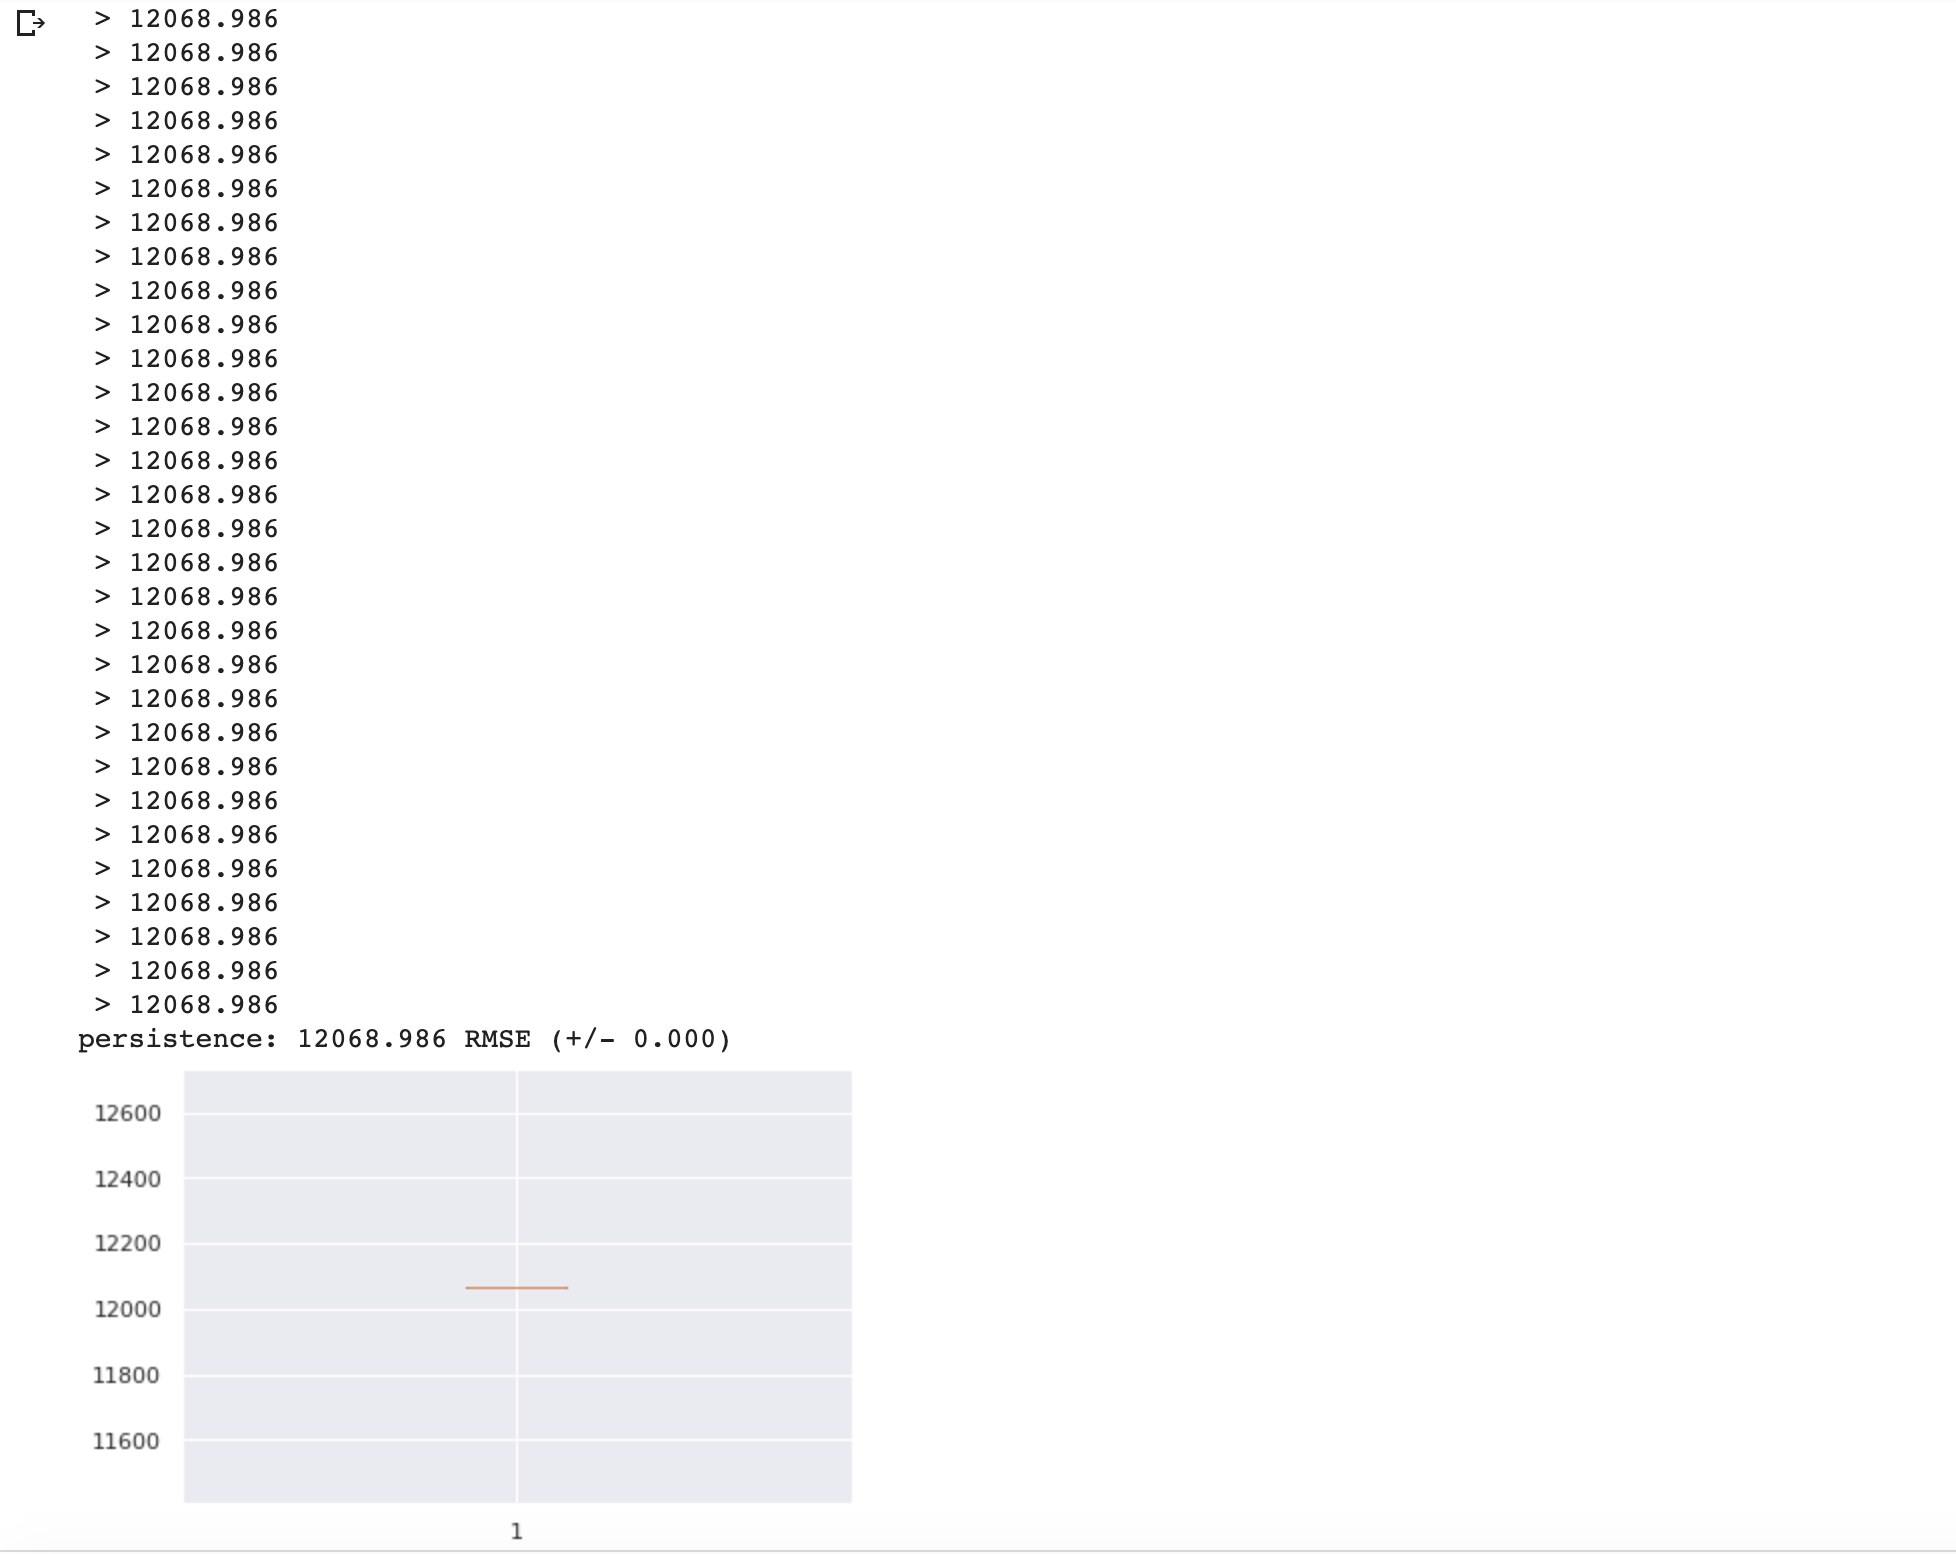

## 7.- Resultado

El grafico arroja el diagrama de caja y bigotes de persistencia RMSE Pronóstico de Cantidad de Pasos.

Podemos ver que el RMSE del modelo es 12068.986, lo que proporciona un límite superior al revisado del modelo anterior pero nos da un punto de inicio para evaluar si un modelo es hábil o no en el problema.
Al ejecutar el ejemplo, se imprime el RMSE del modelo evaluado mediante la validación de avance en los últimos 90 días de datos (3 meses).

El modelo se evalúa 30 veces, aunque, debido a que el modelo no tiene elemento estocástico, la puntuación es la misma cada vez.

Los proximos pasos seran:
- Desarrollar y evaluar Perceptron multicapa simple y redes neuronales convolucionales para el pronóstico de series de tiempo.
- Desarrollar y evaluar el modelo de redes neuronales LSTM, CNN-LSTM y ConvLSTM para el pronóstico de series de tiempo.



# 3.- Modelo de perceptrón multicapa MLPs

El funcionamiento de las redes multicapa es aparentemente simple: reciben un vector de entrada y lo transforman tras realizar operaciones en una serie de capas ocultas. Cada una de estas capas ocultas está compuesta de un conjunto de neuronas, y cada neurona est ́a conectada a todas las neuronas de la capa anterior, lo que se conoce como fully connected. Sin embargo, las neuronas de una misma capas funcionan independientemente y no comparten ninguna conexión.
En la Figura se muestra un ejemplo del cálculo de salida de un nodo oculto, cuyo valor se transmite a la capa final.


La primera red que evaluaré es un perceptrón multicapa, o MLPs para abreviar.

Este es un modelo simple de red neuronal de retroalimentación que debe evaluarse antes de considerar modelos más elaborados.

Los MLPs se pueden utilizar para el pronóstico de series de tiempo tomando múltiples observaciones en pasos de tiempo anteriores, llamadas observaciones de retraso, y usándolas como características de entrada y prediciendo uno o más pasos de tiempo a partir de esas observaciones.

Este es exactamente el encuadre del problema proporcionado por la función series_to_supervised () en la sección anterior.

Por lo tanto, el conjunto de datos de entrenamiento es una lista de muestras, donde cada muestra tiene un número de observaciones de dias antes del tiempo que se pronostica, y el pronóstico es el mes siguiente en la secuencia. 

Por ejemplo:


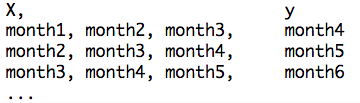

El modelo intentará generalizar sobre estas muestras, de modo que cuando se proporcione una nueva muestra más allá de lo conocido por el modelo, pueda predecir algo útil.

Implementaremos un MLP´s simple utilizando la biblioteca de aprendizaje profundo de Keras.

El modelo tendrá una capa de entrada con algunas observaciones previas. Esto se puede especificar usando el argumento input_dim cuando definimos la primera capa oculta. El modelo tendrá una sola capa oculta con cierto número de nodos, luego una sola capa de salida.

Usaremos la función de activación lineal rectificada en la capa oculta, ya que funciona bien. Usaremos una función de activación lineal (la predeterminada) en la capa de salida porque estamos prediciendo un valor continuo.

La función de pérdida para la red será la pérdida por error cuadrático medio, o MSE, y usaremos el estilo Adam eficiente del descenso de gradiente estocástico para entrenar la red.

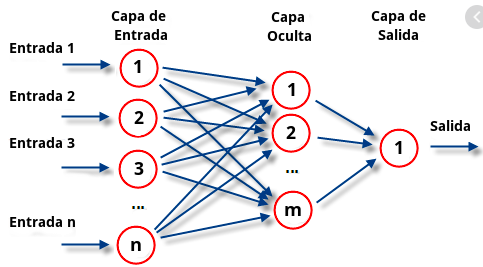

In [ ]:
from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

El modelo se ajustará a algunas épocas de entrenamiento (exposiciones a los datos de entrenamiento) y se puede especificar el tamaño del lote para definir la frecuencia con la que se actualizan los pesos dentro de cada época.
##### 3.a.- Def model_fit

In [ ]:
"""
La función model_fit () para ajustar un modelo MLP en el conjunto de datos de entrenamiento 
se enumera a continuación.

La función espera que la configuración sea una lista con los siguientes hiperparámetros de configuración:
- n_input : el número de observaciones de retardo que se utilizarán como entrada del modelo .
- n_nodes : la cantidad de nodos que se usarán en la capa oculta.
- n_epochs : El programa repetirá este proceso un número fijo de iteraciones. Es decir,la cantidad de veces que se expondrá 
el modelo a todo el conjunto de datos de entrenamiento que serían los (batch).
- n_batch : el número de subconjunto de datos de entrenamiento es decir, muestras dentro de una época después del cual se actualizan los pesos.
"""

# Entreno un modelo
def model_fit(train, config):
	# Desempaquetar la config
	n_input, n_nodes, n_epochs, n_batch = config
	# Preparar la data
	data = series_to_supervised(train, n_in=n_input)
	train_x, train_y = data[:, :-1], data[:, -1]
	# Defino el modelo
	model = Sequential()
	model.add(Dense(n_nodes, activation='relu', input_dim=n_input))
	model.add(Dense(1))
	model.compile(loss='mse', optimizer='adam')
	# Entreno
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return model

Para hacer una predicción más allá del límite de datos conocidos, esto requiere que las últimas n observaciones conocidas se tomen como una matriz y se utilicen como entrada.

### 3.b.- Def model_predict

In [ ]:
"""
La función predict () espera una o más muestras de entradas al hacer una predicción, 
por lo que proporcionar una sola muestra requiere que la matriz tenga la forma [ 1, n_input ], donde:
- n_input es el número de pasos de tiempo que el modelo espera como entrada.
De manera similar, la función predict () devuelve una matriz de predicciones, 
una para cada muestra proporcionada como entrada. En el caso de una predicción, habrá una matriz con un valor.

Acontinuación implementa este comportamiento, tomando el modelo, las observaciones anteriores 
y la configuración del modelo como argumentos, formulando una muestra de entrada, haciendo una predicción 
de un paso que luego se devuelve. Hacer una predicción con un modelo MLP ajustado es tan sencillo como llamar 
a la función predict () y pasar una muestra de los valores de entrada necesarios para realizar la predicción.
"""

# Pronóstico con un modelo pre-ajustado
def model_predict(model, history, config):
	# Desempaqueto la configuración
	n_input, _, _, _ = config
	# Preparo la data
	x_input = array(history[-n_input:]).reshape(1, n_input)
	# Predigo
	yhat = model.predict(x_input, verbose=0)
	return yhat[0]

### 3.c.- Aplicando:

Ahora tenemos todo lo que necesitamos para evaluar un modelo MLP en el conjunto de datos de cantidad diaria de  pasos.

Se realizará una búsqueda de cuadrícula simple de hiperparámetros del modelo. Puede que esta no sea una configuración óptima, pero es lpermitirá iniciar el analisis:
- n_input : 30 (por ejemplo, 30 dias)
- n_nodos : 500
- n_epochs : 100
- n_lote : 100
Esta configuración se puede definir como una lista:

In [ ]:
# Defino la configuración
config = [30, 500, 100, 100]

Cuando los datos de entrenamiento se enmarcan como un problema de aprendizaje supervisado, solo hay 72 muestras que se pueden usar para entrenar el modelo.
El uso de un tamaño de lote de 72 o más significa que el modelo se está entrenando utilizando el descenso de gradiente de lote en lugar del descenso de gradiente de mini lote. Esto se usa a menudo para pequeños conjuntos de datos y significa que las actualizaciones de peso y los cálculos de gradiente se realizan al final de cada época, en lugar de varias veces dentro de cada época.

In [ ]:
#data = series.values
# Separar la data
#n_test = 90
# define config
#config = [30, 500, 100, 100]
# Grid search
#scores = repeat_evaluate(data, config, n_test)
# Resumir puntuaciones
#summarize_scores('mlp', scores)

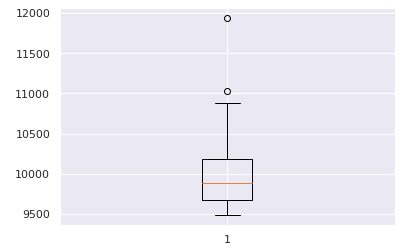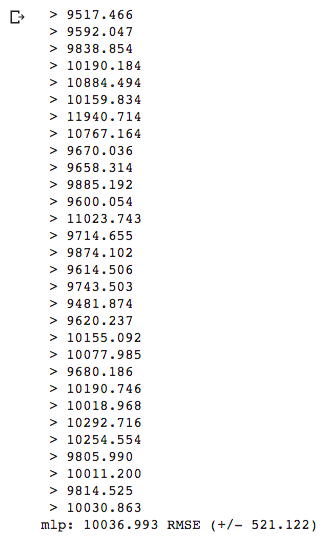

La ejecución imprime el RMSE para cada una de las 30 evaluaciones repetidas del modelo.

Sus resultados pueden variar dada la naturaleza estocástica del algoritmo, procedimiento de evaluación, o las diferencias en la precisión numérica. Lo ejecuta varias veces y compara el resultado promedio.
Se crea un diagrama de caja y bigotes de las puntuaciones de RMSE para resumir la distribución del rendimiento del modelo.


Esto ayuda a comprender la distribución de las puntuaciones. Podemos ver que aunque en promedio el rendimiento del modelo es mejor que el anterior, el diferencial mejora. La desviación estándar es de 521 pasos.

Un desafío en el uso del modelo MLP es aprovechar la habilidad superior y minimizar la variación del modelo en múltiples ejecuciones. Hay muchas estrategias que podría usar, pero quizás la más simple sea simplemente entrenar múltiples modelos finales en todos los datos disponibles y usarlos en un conjunto al hacer predicciones, por ejemplo, la predicción es el promedio de modelos de 10 a 30.

Podemos ver que, en promedio, la configuración elegida tiene mejores prestaciones que tanto el modelo anterior.

Esto es un fuerte avance dado que el modelo operó directamente con los datos brutos sin escalar o sin que los datos se vuelvan estacionarios.

In [ ]:
# Probaré con otros parametros:
# Separar la data
#n_test = 90
# define config
#config = [14, 30, 90, 120]
# Grid search
#scores = repeat_evaluate(data, config, n_test)
# Resumir puntuaciones
#summarize_scores('mlp', scores)

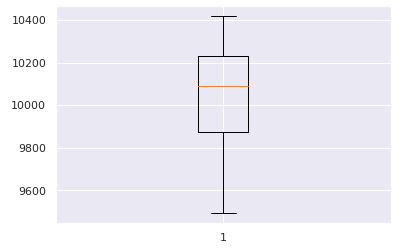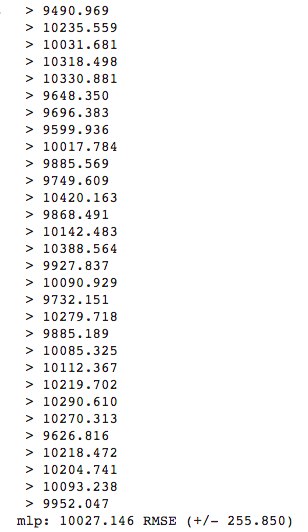

In [ ]:
#data = series.values
# Separar la data
#n_test = 7
# define config
#config = [14, 30, 90, 120]
# Grid search
#scores = repeat_evaluate(data, config, n_test)
# Resumir puntuaciones
#summarize_scores('mlp', scores)

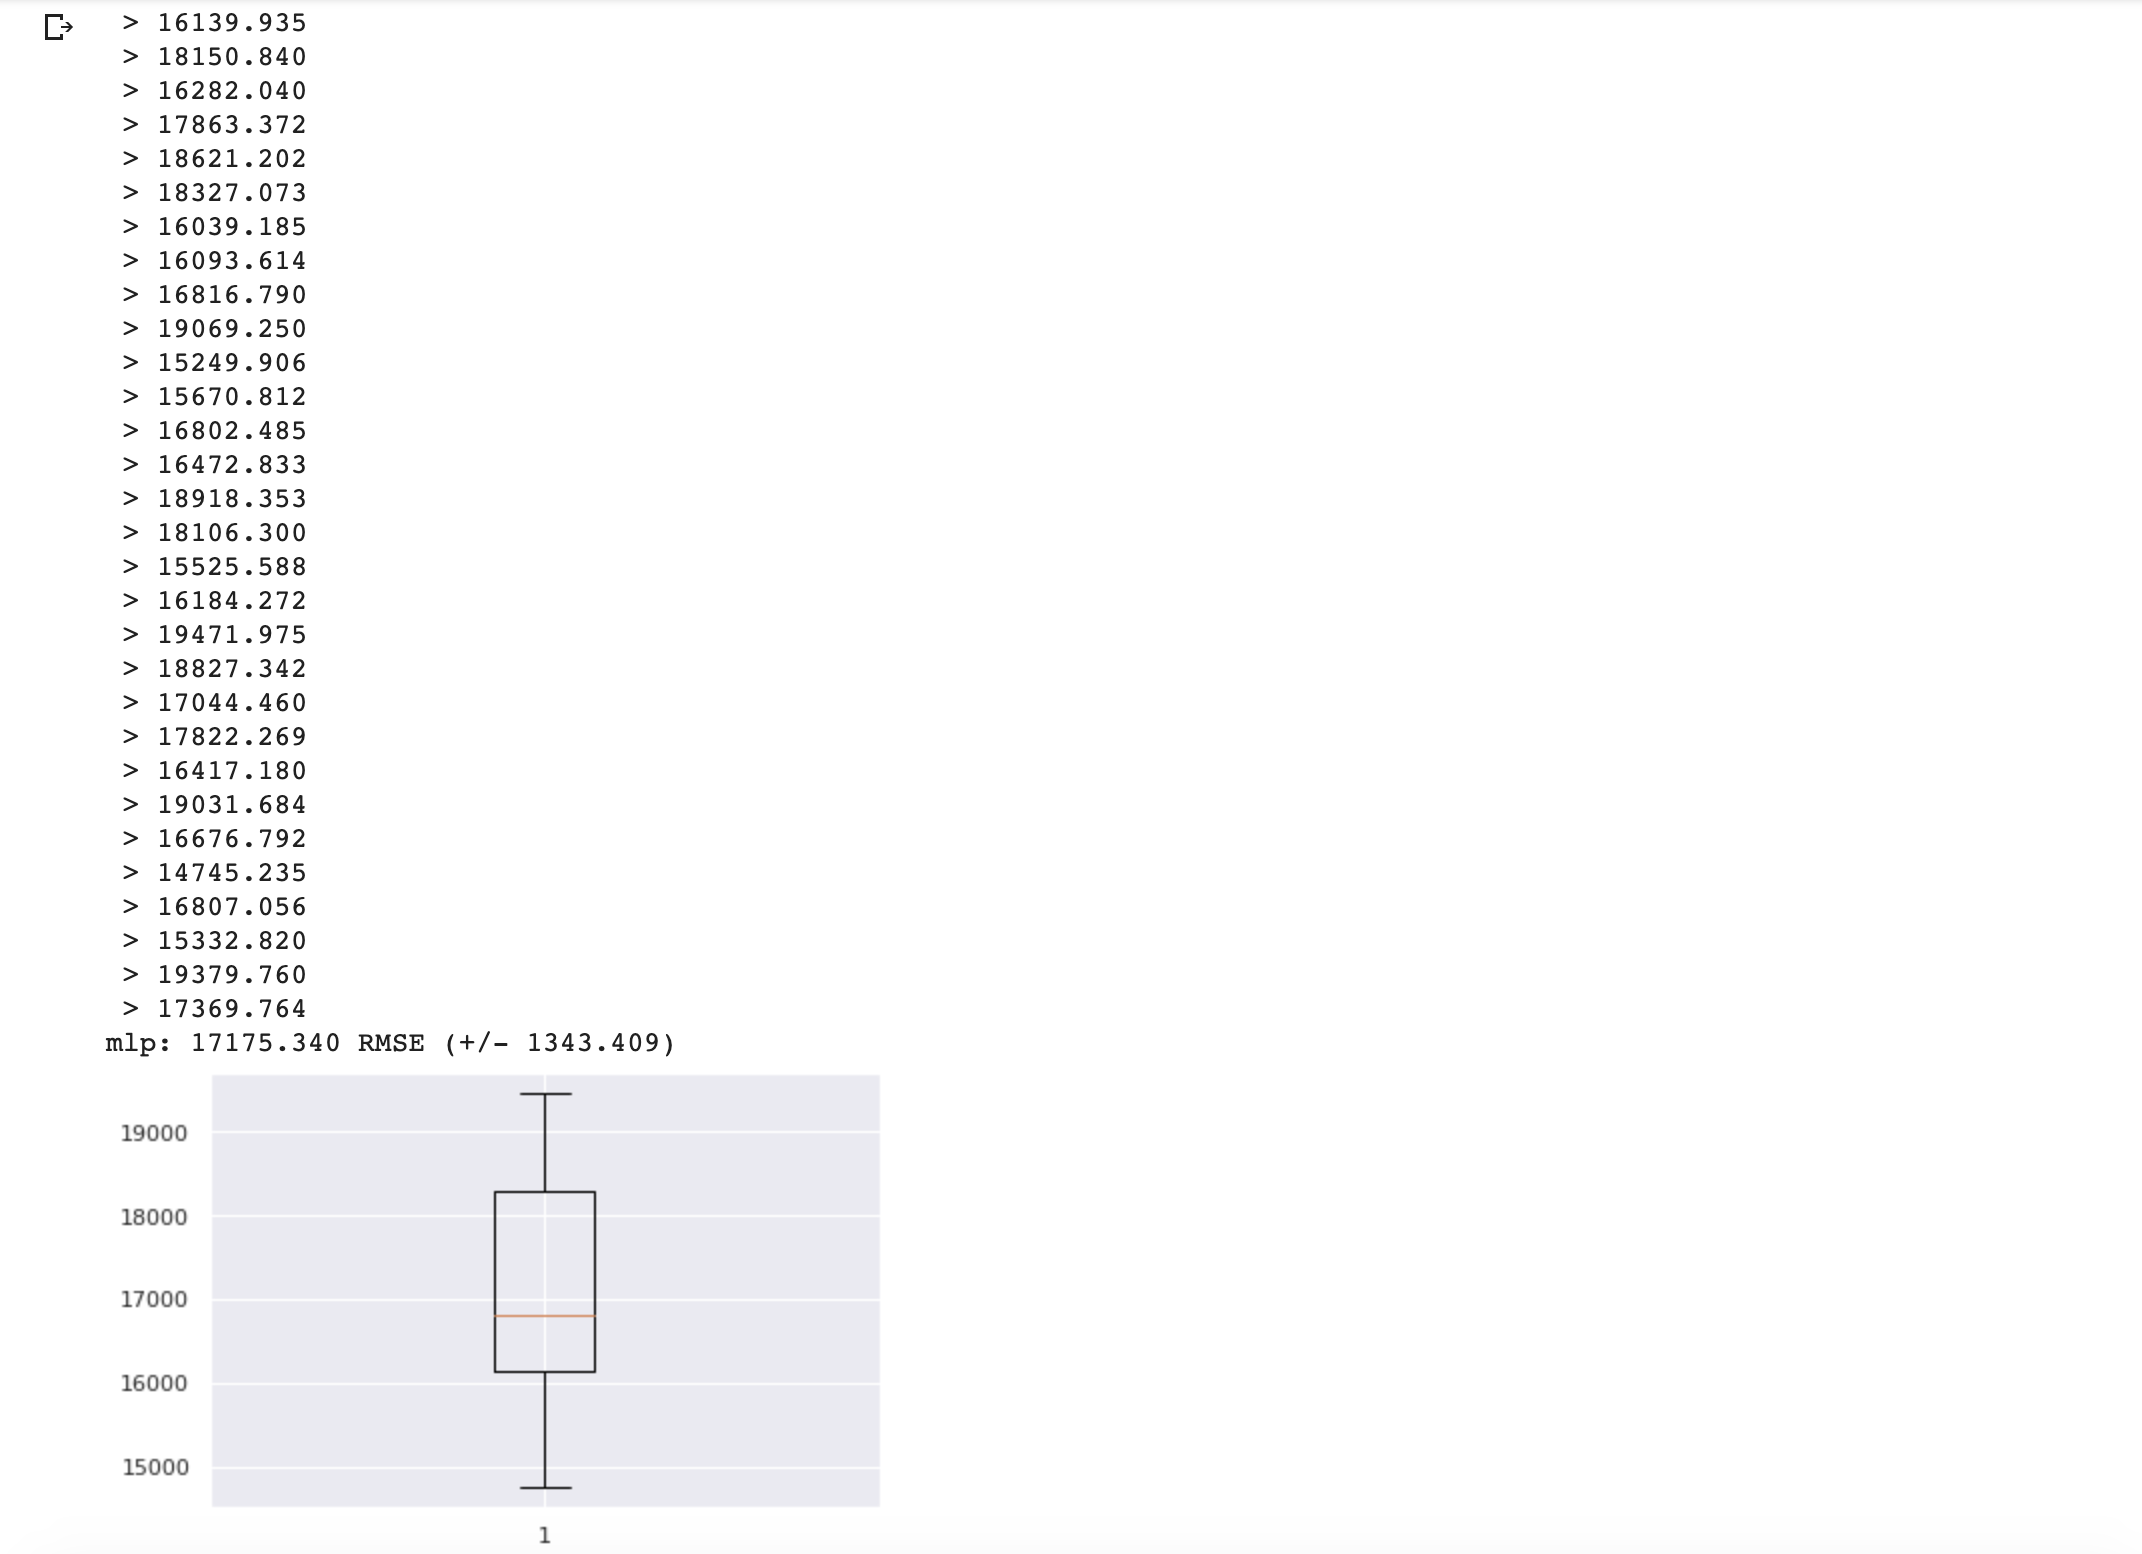

In [ ]:
#data = series.values
# Separar la data
#n_test = 7
# define config
#config = [30, 500, 100, 100]
# Grid search
#scores = repeat_evaluate(data, config, n_test)
# Resumir puntuaciones
#summarize_scores('mlp', scores)

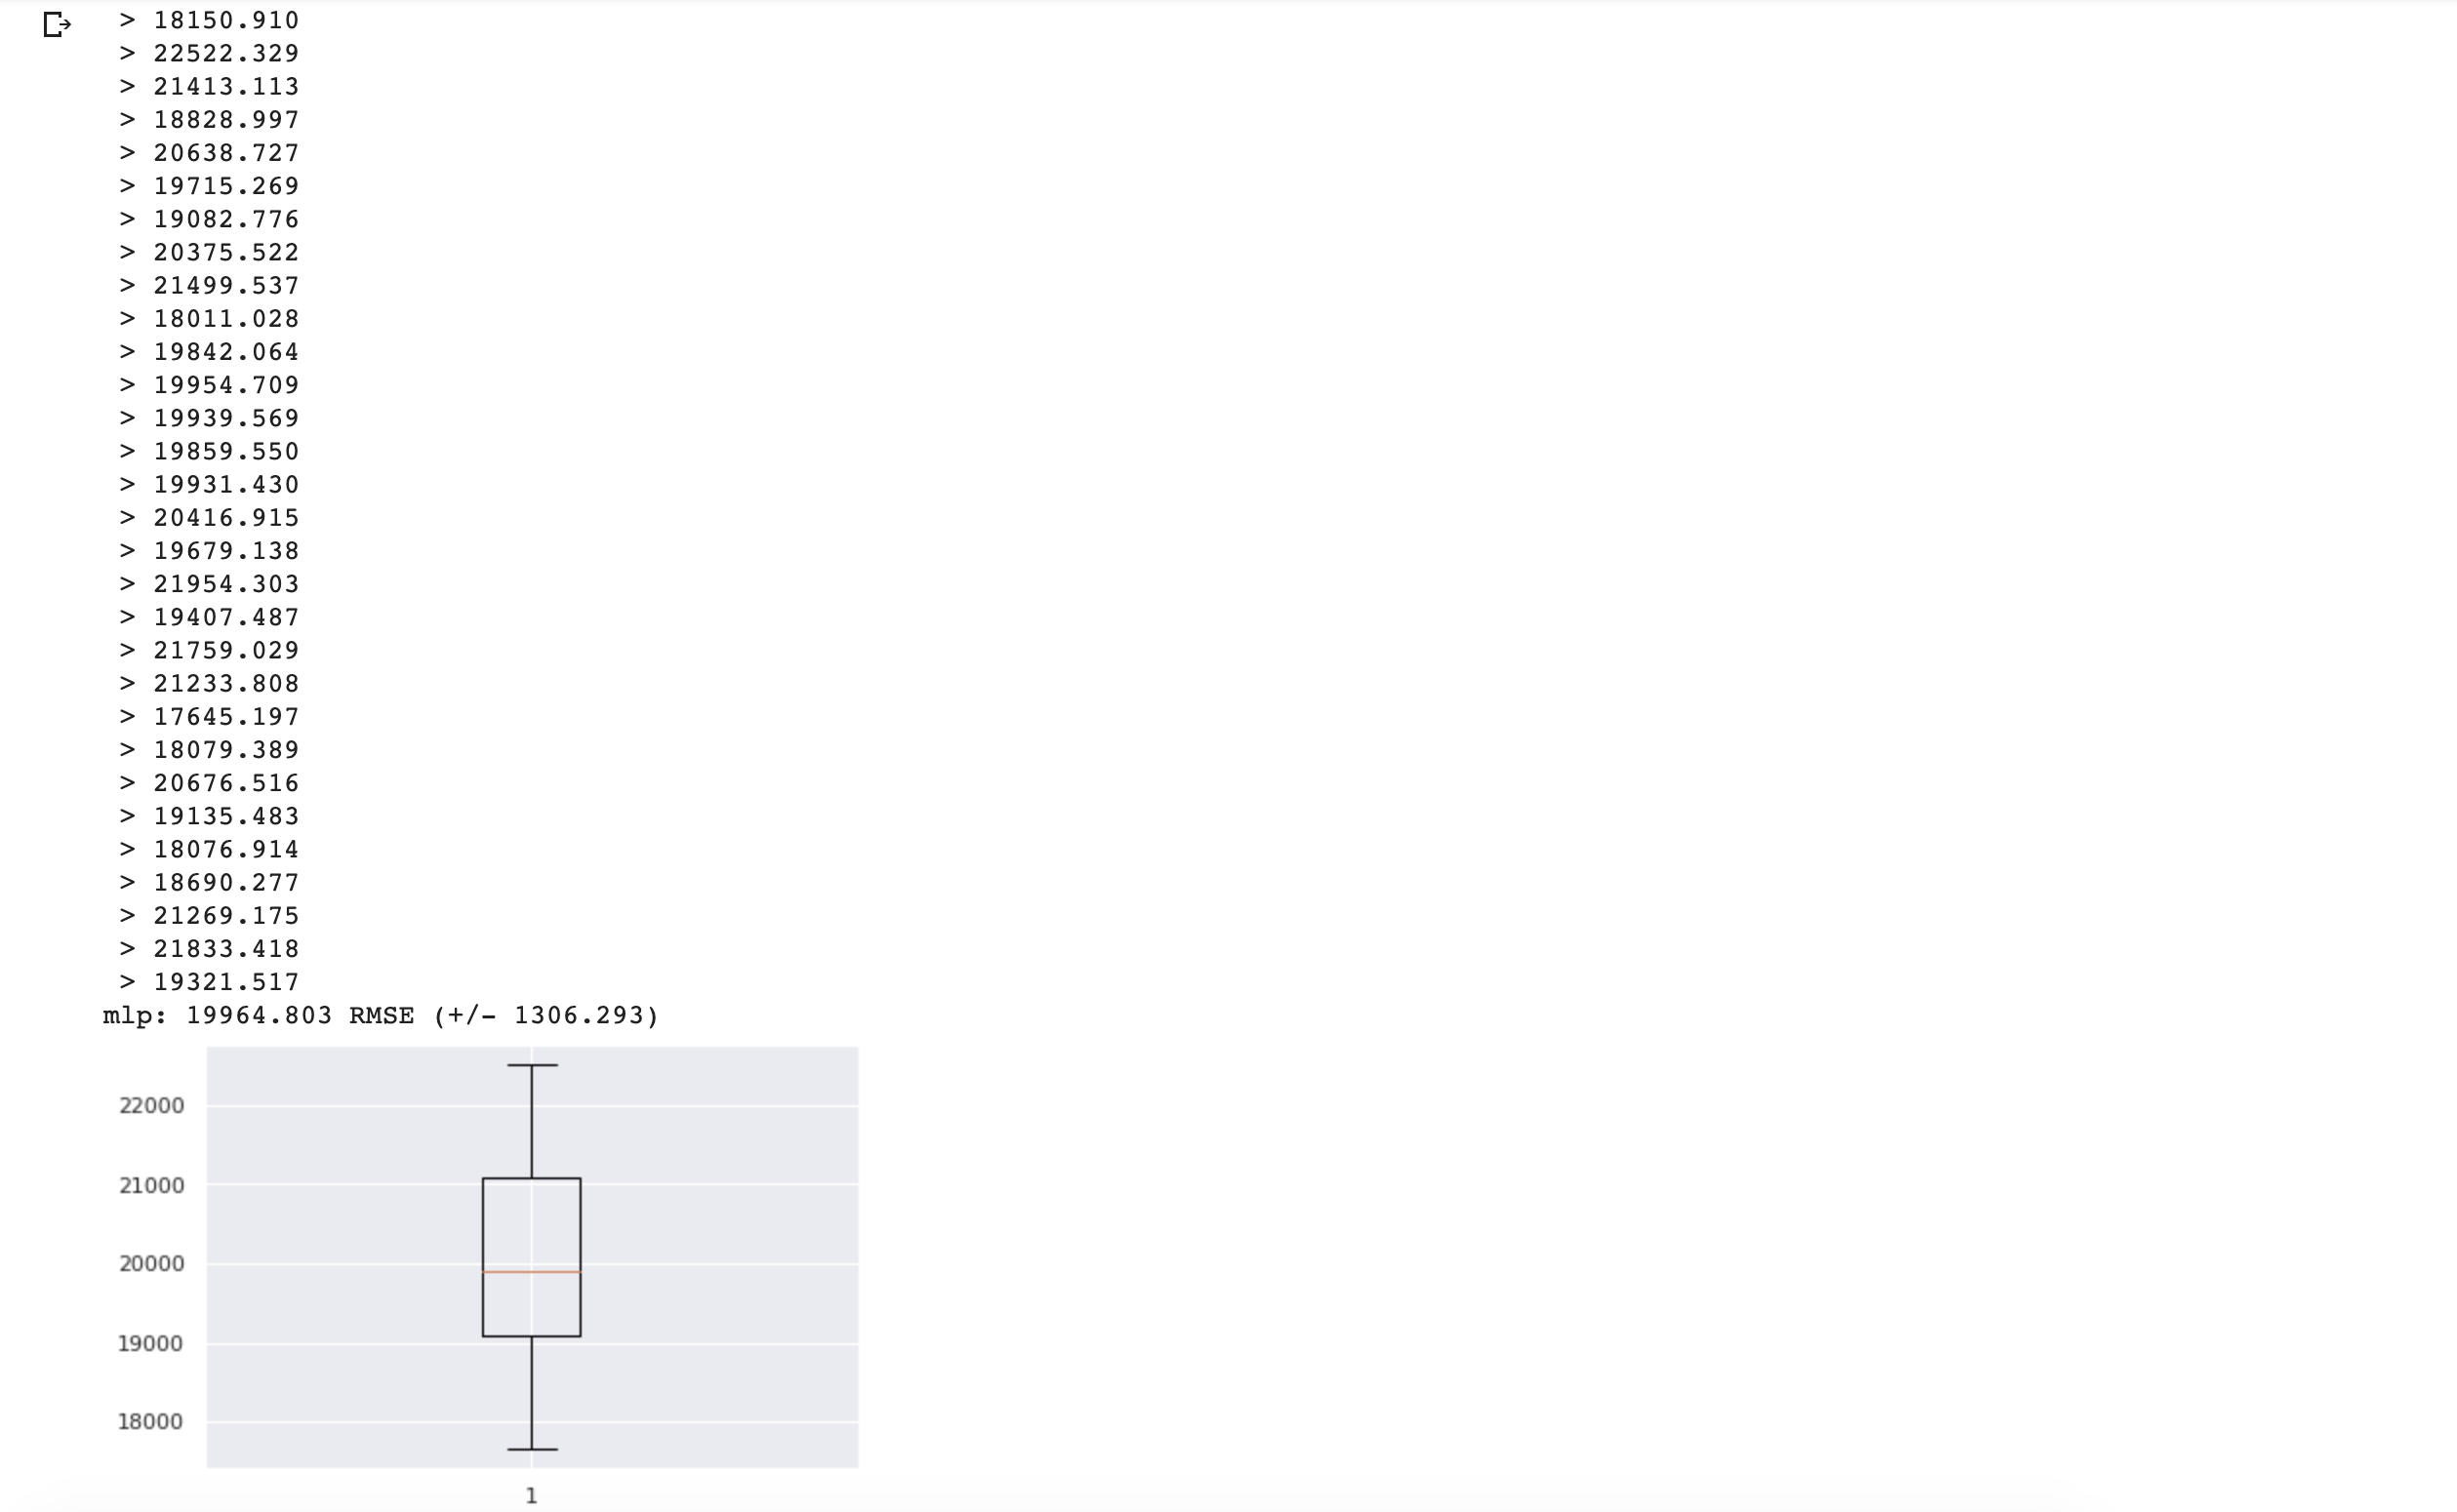

In [ ]:
#data = series.values
# Separar la data
#n_test = 7
# define config
#config = [7, 14, 30, 90]
# Grid search
#scores = repeat_evaluate(data, config, n_test)
# Resumir puntuaciones
#summarize_scores('mlp', scores)

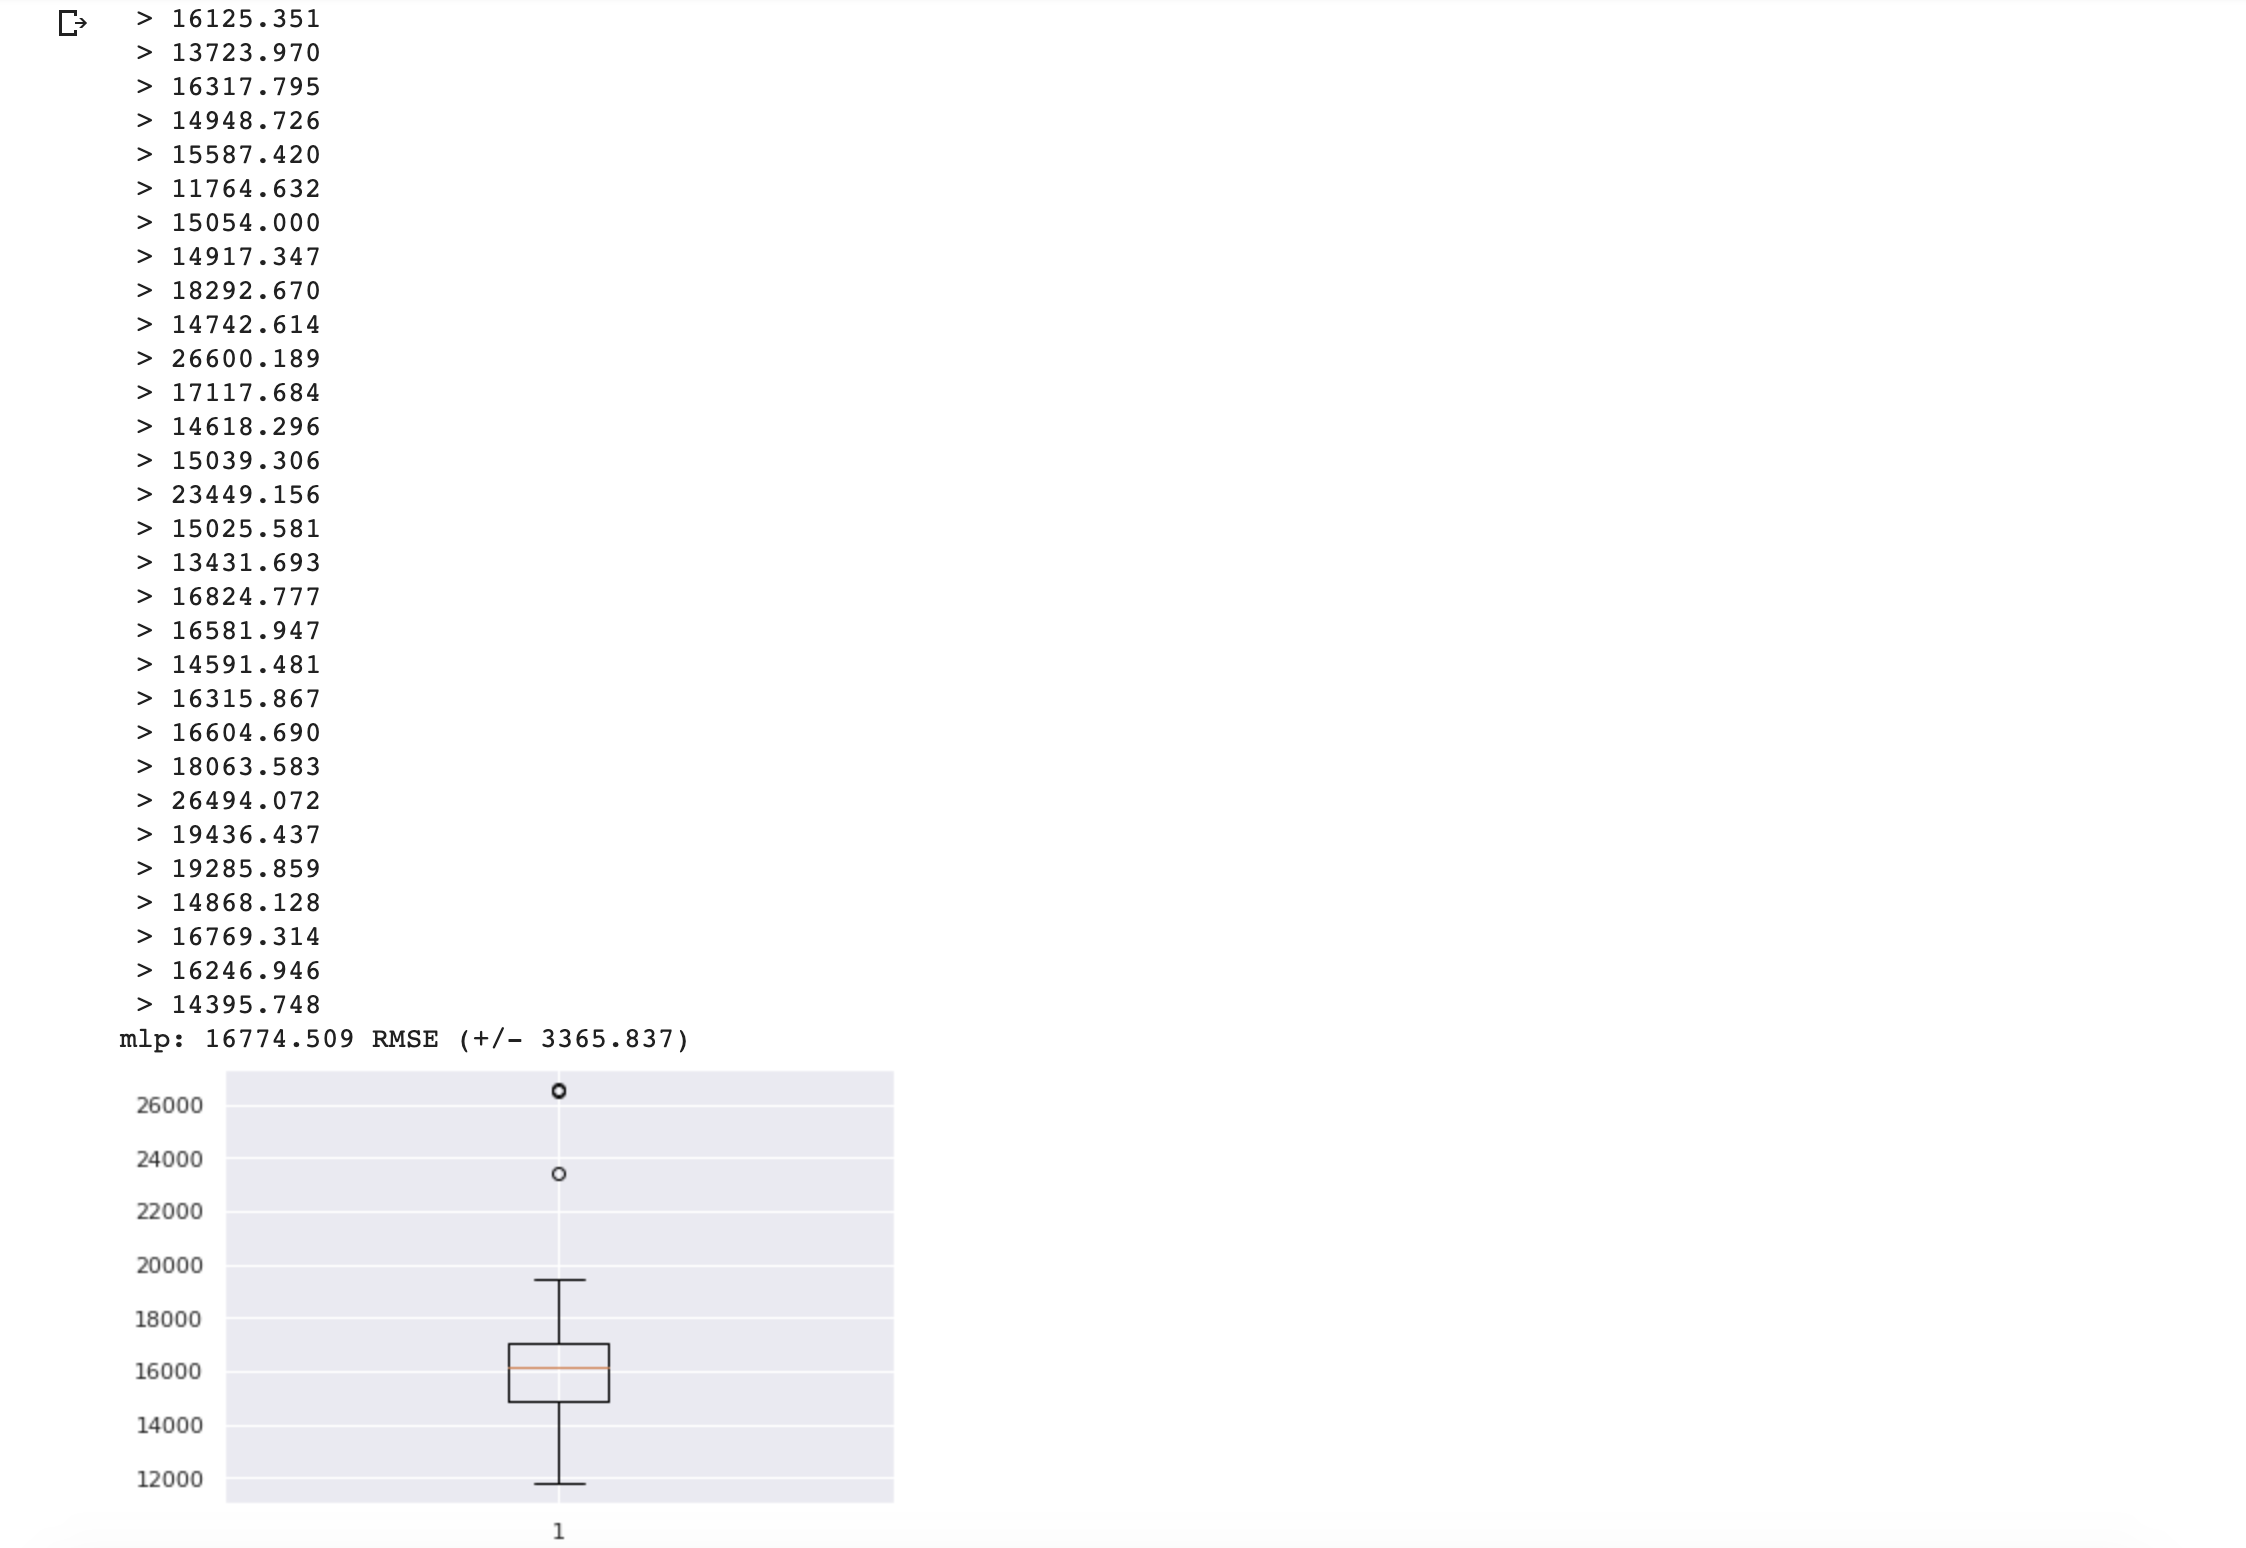

## 3.d.- Resultado

El mejor modelo fue el de los siguientes parametros:
- n_test = 90
- Configuración: config = [14, 30, 90, 120]
- Oteniendo un nlp 10.036 y RMSE ( + / - 255 )

# 4.- Modelo de red neuronal convolucional

Las redes neuronales convolucionales, o CNN, son un tipo de red neuronal desarrollada para datos de imágenes bidimensionales, aunque pueden usarse para datos unidimensionales, como secuencias de texto y series de tiempo.

Cuando se opera con datos unidimensionales, la CNN lee una secuencia de observaciones de retraso y aprende a extraer características que son relevantes para hacer una predicción.

Definiremos una CNN con dos capas convolucionales para extraer entidades de las secuencias de entrada. Cada uno tendrá un número configurable de filtros y tamaño de kernel y utilizará la función de activación lineal rectificada. El número de filtros determina el número de campos paralelos en los que se leen y proyectan las entradas ponderadas. El tamaño del kernel define el número de pasos de tiempo leídos dentro de cada instantánea a medida que la red lee a lo largo de la secuencia de entrada.

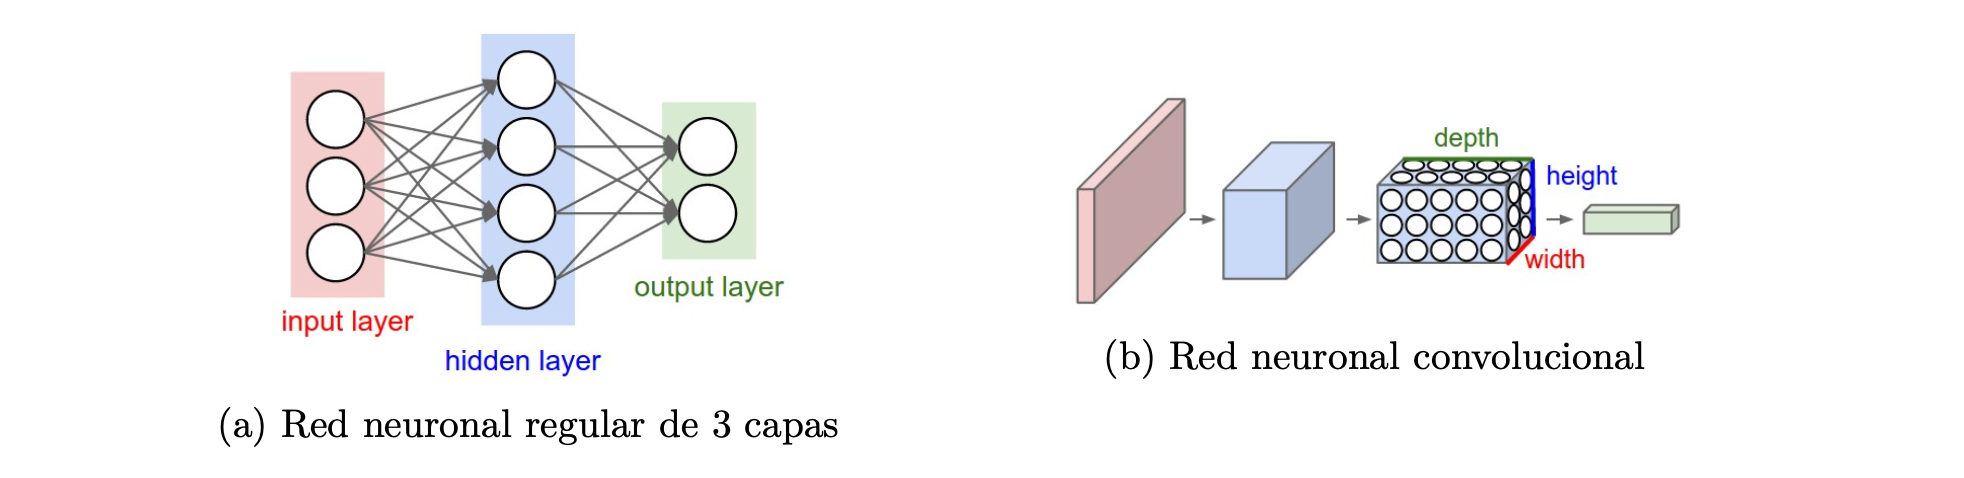

Se utiliza una capa de agrupación máxima después de las capas convolucionales para destilar las características de entrada ponderadas en aquellas que son más destacadas, reduciendo el tamaño de entrada en 1/4. Las entradas agrupadas se aplanan a un vector largo antes de ser interpretadas y utilizadas para hacer una predicción de un paso.

El modelo de CNN espera que los datos de entrada estén en forma de múltiples muestras, donde cada muestra tiene múltiples pasos de tiempo de entrada, lo mismo que el MLP en la sección anterior.

Una diferencia es que la CNN puede admitir múltiples características o tipos de observaciones en cada paso de tiempo, que se interpretan como canales de una imagen. Solo tenemos una característica única en cada paso de tiempo, por lo tanto, la forma tridimensional requerida de los datos de entrada será     [ n_samples , n_input , 1 ].


.

**CONECTIVIDAD LOCAL DE UNA RED CONVOLUCIONAL**

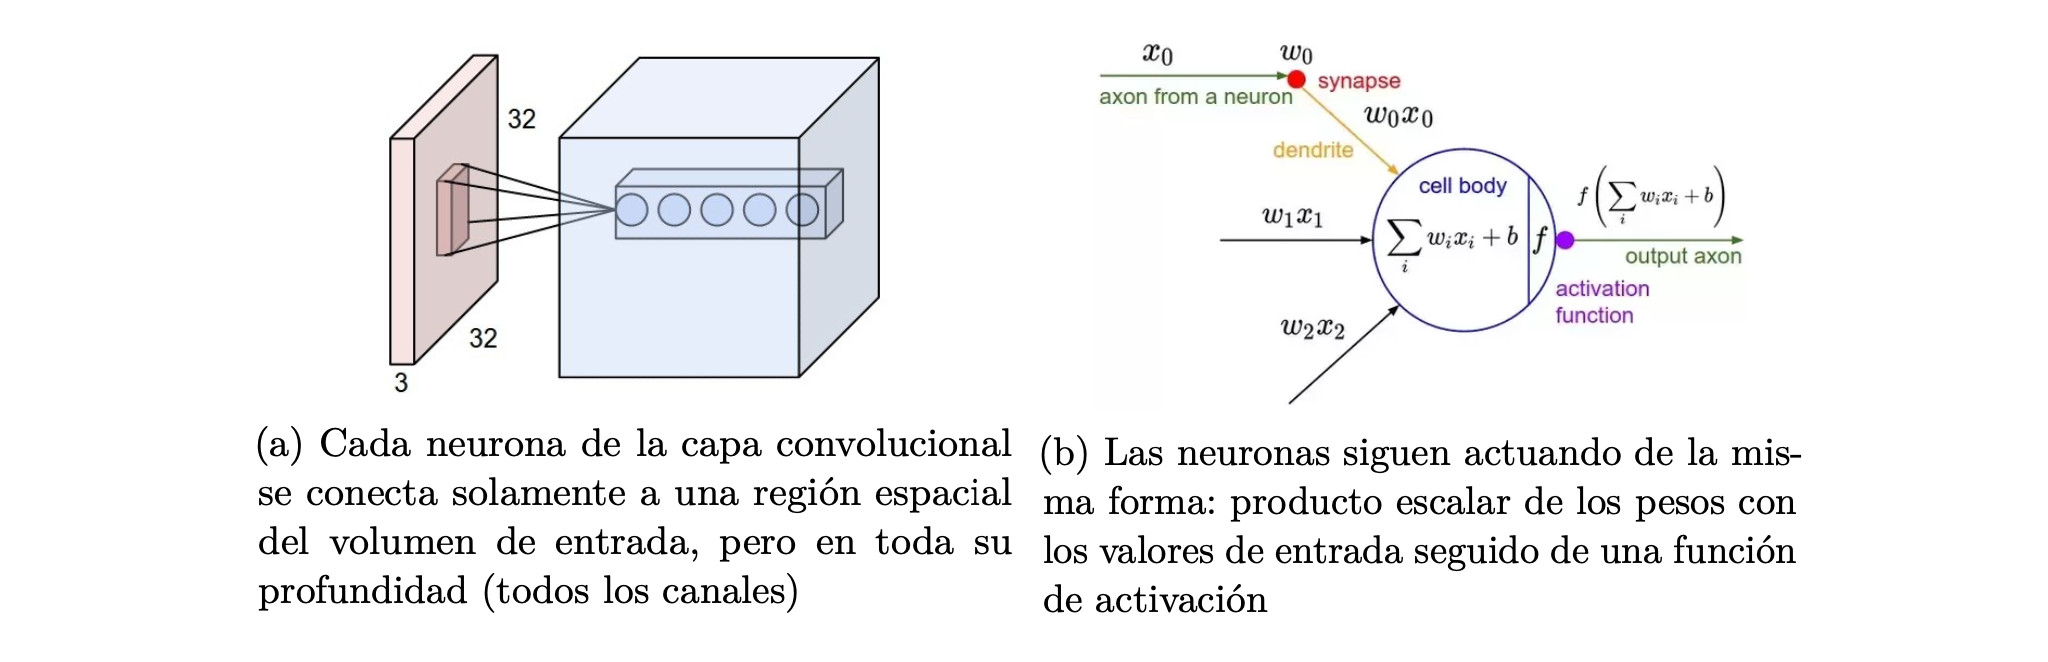

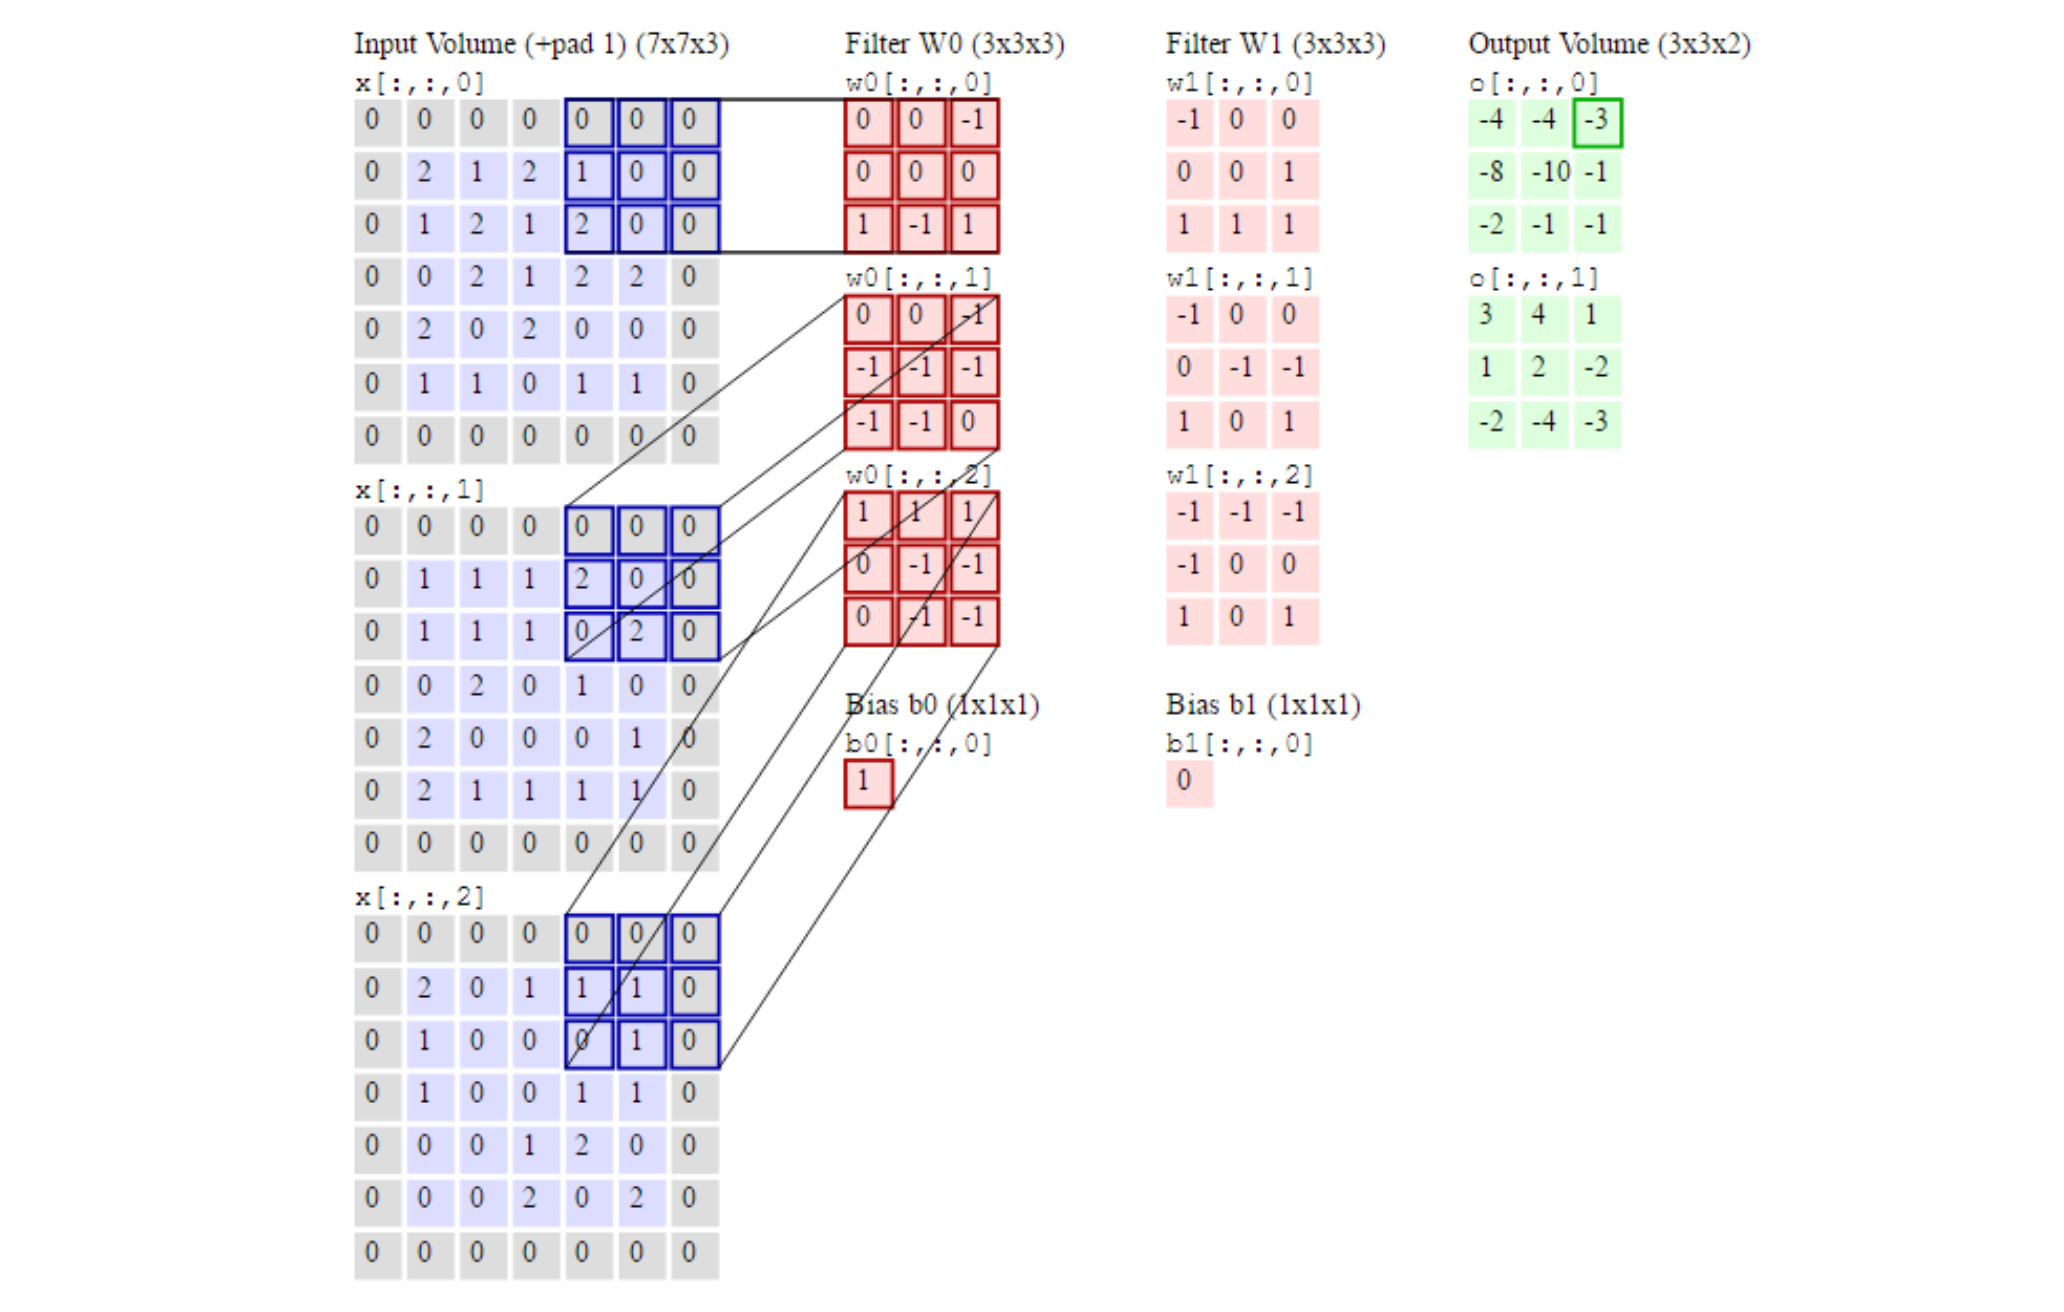

In [ ]:
#train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))

#### 4.a.- Def model_fit

In [ ]:
"""
La función model_fit () para ajustar el modelo CNN en el conjunto de datos de entrenamiento 
se plantea a continuación.
El modelo toma los siguientes cinco parámetros de configuración como una lista:

- n_input : El número de observaciones de retardo que se utilizarán como entrada del modelo.
- n_filters : El número de filtros paralelos.
- n_kernel : Filtros o kernels que son objeto de aprendizaje, para obtener un mapa de características de la serie original.
El número de pasos de tiempo considerados en cada lectura de la secuencia de entrada. 
- n_epochs : La cantidad de veces que se expondrá el modelo a todo el conjunto de datos de entrenamiento.
- n_batch : El número de muestras dentro de una época después del cual se actualizan los pesos.
"""

# Entreno un modelo
def model_fit(train, config):
	# Descompongo la configuración 
	n_input, n_filters, n_kernel, n_epochs, n_batch = config
	# Preparo la data
	data = series_to_supervised(train, n_in=n_input)
	train_x, train_y = data[:, :-1], data[:, -1]#Divido en Train y Test
	train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
	# Defino el modelo
	model = Sequential()
	model.add(Conv1D(filters=n_filters, kernel_size=n_kernel, activation='relu', input_shape=(n_input, 1)))
	model.add(Conv1D(filters=n_filters, kernel_size=n_kernel, activation='relu'))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(Dense(1))
	model.compile(loss='mse', optimizer='adam')
	# Entreno
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return model

#### 4.b.- Def model_predict

In [ ]:
"""
Hacer una predicción con el modelo de ajuste CNN es muy similar a hacer una predicción con el modelo 
de ajuste MLP de la sección anterior de Modelo de perceptrón multicapa MLPs
La única diferencia está en el requisito de especificar el número de características observadas 
en cada paso de tiempo, que en este caso es 1. Por lo tanto, al hacer una predicción de un solo paso, 
la forma de la matriz de entrada debe ser:
[ 1 , n_input , 1]
"""

# Predicción con un modelo pre-ajustado
def model_predict(model, history, config):
	# Descomponiendo la configuración
	n_input, _, _, _, _ = config
	# Preparando la data
	x_input = array(history[-n_input:]).reshape((1, n_input, 1))
	# Predicción
	yhat = model.predict(x_input, verbose=0)
	return yhat[0]

## 4.c.- Aplicando:

Hacer una predicción con el modelo de ajuste CNN es muy similar a hacer una predicción con el modelo de ajuste MLP de la sección anterior. La única diferencia está en el requisito de especificar el número de características observadas en cada paso de tiempo, que en este caso es 1. Por lo tanto, al hacer una predicción de un solo paso.
Al ejecutar el código primero imprime el RMSE para cada evaluación repetida del modelo.
Se realizará una búsqueda de cuadrícula simple de hiperparámetros del modelo se elijirá la siguiente configuración. Esta es una configuración inicial para ir testeando el modelo.

La configuración elegida es la siguiente:
- n_input : 36. El número de observaciones de retardo que se utilizarán como entrada del modelo.
- n_filtros : 256
- n_kernel : 3
- n_epochs : 100 la cantidad de veces que se expondrá el modelo a todo el conjunto de datos de entrenamiento
- n_batch : 100 (por ejemplo, descenso de gradiente por lotes) Esto se puede especificar como una lista de la siguiente manera:


In [ ]:
# Evaluando Cnn
from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from matplotlib import pyplot

# data split
# n_test = 36
# define config
# config = [30, 256, 3, 100, 100]
# grid search
# scores = repeat_evaluate(data, config, n_test)
# summarize scores
# summarize_scores('cnn', scores)

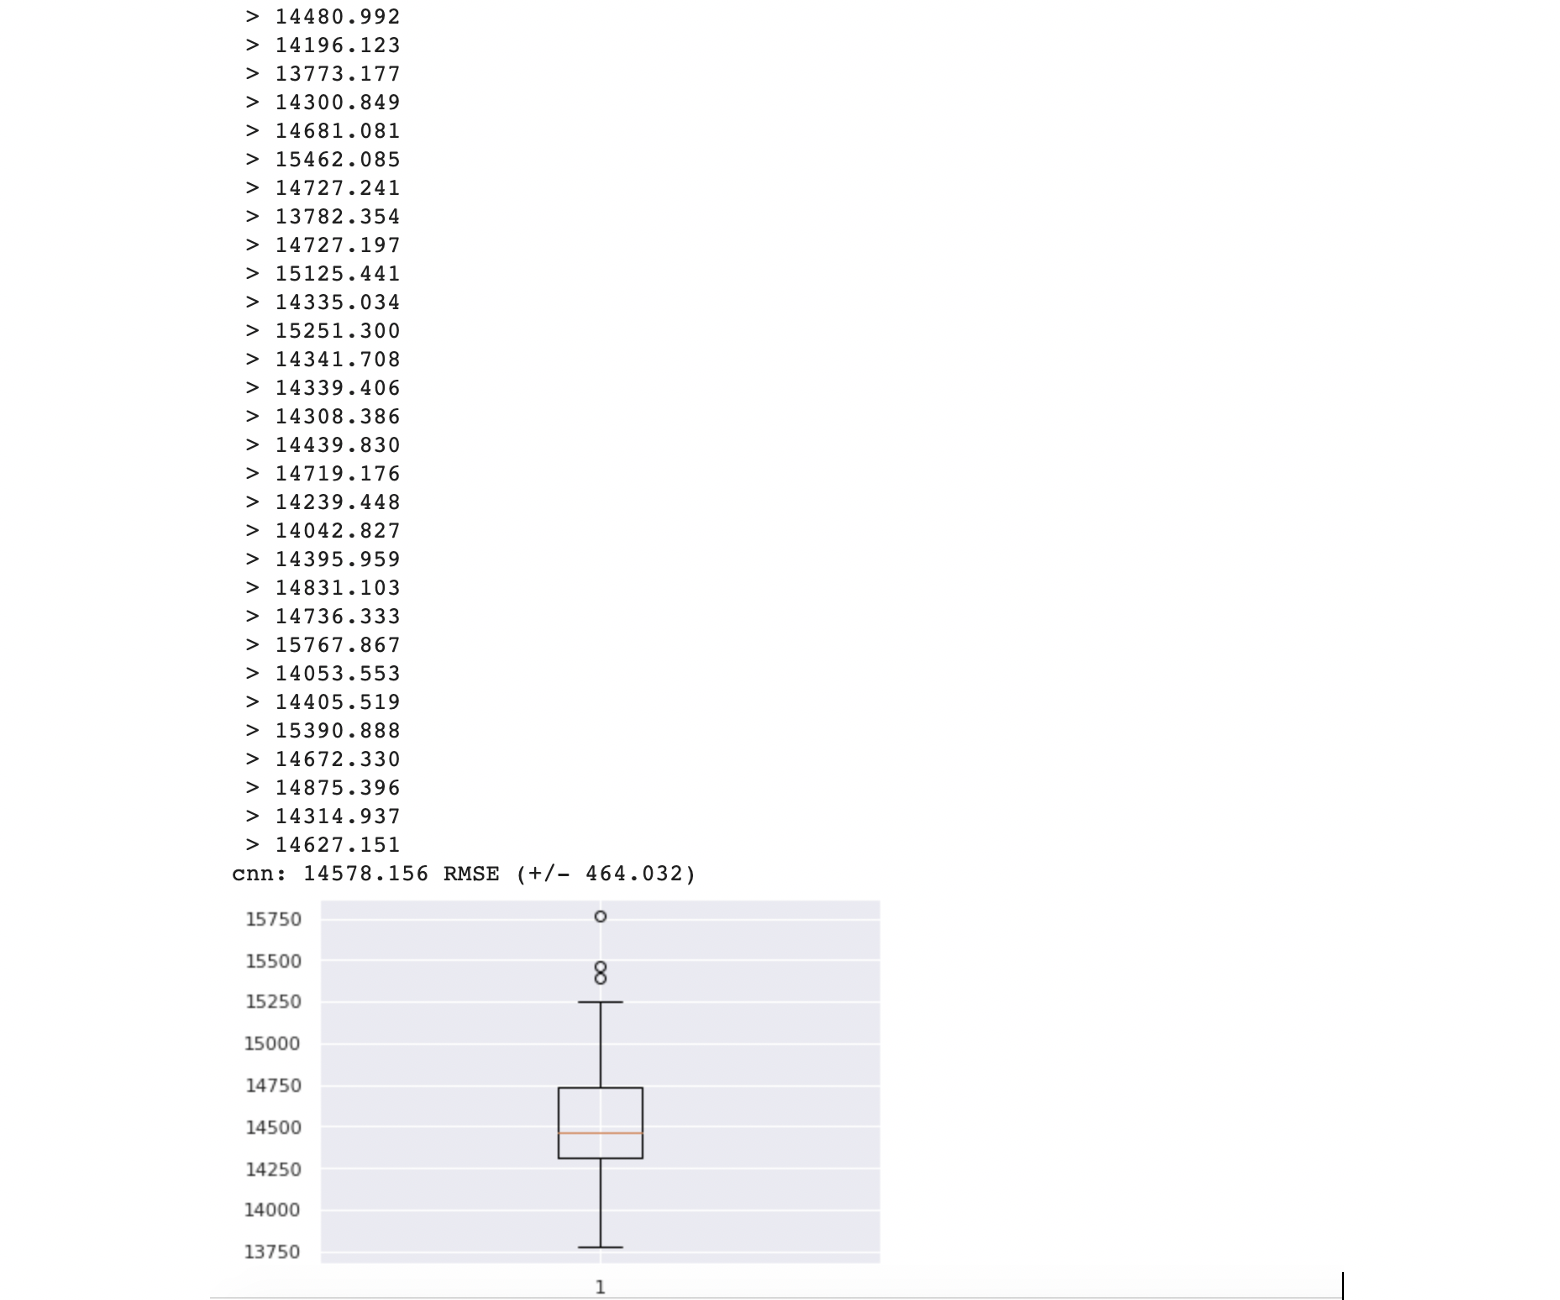

Probando otra configuración:
- n_input : 30 (30 dias). El número de observaciones de retardo que se utilizarán como entrada del modelo.
- n_filtros : 256
- n_kernel : 3
- n_epochs : 100 la cantidad de veces que se expondrá el modelo a todo el conjunto de datos de entrenamiento
- n_batch : 100 (por ejemplo, descenso de gradiente por lotes)
Esto se puede especificar como una lista de la siguiente manera:

In [ ]:
# Defino config
config = [30, 256, 3, 100, 100]

 > 14831.529
 > 13987.017
 > 14818.283
 > 14511.922
 > 15407.361
 > 15840.251
 > 14414.737
 > 14687.090
 > 14459.007
 > 14547.953
 > 14486.060
 > 14004.649
 > 14284.101
 > 14855.998
 > 14481.015
 > 14915.942
 > 14614.563
 > 13916.160
 > 13928.163
 > 14408.210
 > 14586.796
 > 14315.457
 > 14021.096
 > 14382.884
 > 14392.372
 > 14236.863
 > 14448.879
 > 15638.618
 > 14826.246
 > 14138.846
cnn: 14546.269 RMSE (+/- 456.772)


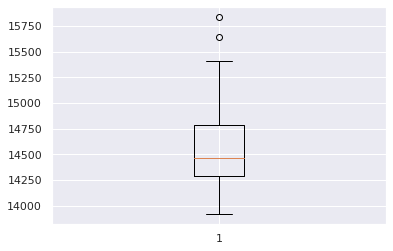

In [ ]:
# data split
#n_test = 30
# define config
#config = [30, 256, 3, 100, 100]
# grid search
#scores = repeat_evaluate(data, config, n_test)
# summarize scores
#summarize_scores('cnn', scores)


## 4.d.- Resultado

Podemos ver que efectivamente el modelo es hábil, logrando un RMSE promedio de 14.546, que es peor que el modelo MLP.
Esto es óptimo dado que el modelo operó directamente con los datos brutos sin escalar o sin que los datos se vuelvan estacionarios.

La desviación estándar de la puntuación es mejor que el modelo MLP alrededor de 456 pasos, pero es una reducción del 13% v/s los 521 del modelo MLP del tamaño de la varianza observada con el modelo MLP en la sección anterior. T

Se crea un diagrama de caja y bigotes de las puntuaciones para ayudar a comprender la propagación del error a lo largo de las corridas.

#5.- Modelos de redes neuronales recurrentes

Las redes neuronales recurrentes, o RNNs, son esos tipos de redes neuronales que utilizan una salida de la red de un paso anterior como entrada en un intento de aprender automáticamente a través de datos de secuencia.

La red Long Short-Term Memory, o LSTM, es un tipo de RNN cuya implementación aborda las dificultades generales en el entrenamiento de RNN en datos de secuencia que dan como resultado un modelo estable. Lo logra aprendiendo los pesos de las puertas internas que controlan las conexiones recurrentes dentro de cada nodo.

Aunque se desarrollaron para datos de secuencia, los LSTM no han demostrado ser efectivos en problemas de predicción de series de tiempo donde el resultado es una función de observaciones recientes, por ejemplo, un problema de predicción de tipo autorregresivo, como el conjunto de datos de pasos por día de la autopista Illia.

No obstante, podemos desarrollar modelos LSTM para problemas autorregresivos y utilizarlos como punto de comparación con otros modelos de redes neuronales.

En esta sección, exploraremos tres variaciones del modelo LSTM para el pronóstico de series de tiempo univariantes; Ellos son:

- LSTM : la red LSTM tal cual.
- CNN-LSTM : una red de CNN que aprende características de entrada y un LSTM que las interpreta.
- ConvLSTM : una combinación de CNN y LSTM donde las unidades LSTM leen datos de entrada utilizando el proceso convolucional de una CNN.

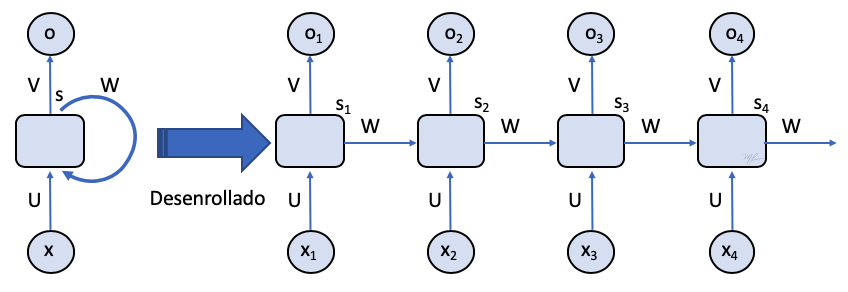

# 5.1.- LSTM
La red neuronal LSTM se puede utilizar para pronósticos de series de tiempo univariantes.

Como RNN, leerá cada paso de tiempo de una secuencia de entrada un paso a la vez. El LSTM tiene una memoria interna que le permite acumular el estado interno a medida que lee los pasos de una secuencia de entrada determinada.

Al final de la secuencia, cada nodo de una capa de unidades LSTM ocultas generará un valor único. Este vector de valores resume lo que el LSTM aprendió o extrajo de la secuencia de entrada. Esto puede ser interpretado por una capa completamente conectada antes de que se haga una predicción final.



Al igual que la CNN, la LSTM puede admitir múltiples variables o funciones en cada paso de tiempo. Como el conjunto de datos de ventas de automóviles solo tiene un valor en cada paso de tiempo, podemos fijarlo en 1, tanto al definir la entrada a la red en el argumento input_shape [ n_input , 1 ] como al definir la forma de las muestras de entrada.

A diferencia de MLP y CNN que no leen los datos de secuencia paso a paso, el LSTM funciona mejor si los datos están estacionarios. Esto significa que se realizan operaciones de diferencia para eliminar la estructura de tendencia y estacional.

En el caso del conjunto de cantidad de pasos por día, podemos hacer la preparación de datos realizando un ajuste estacional, es decir, restando el valor de hace un año de cada observación.

Esto se puede realizar de forma sistemática para todo el conjunto de datos de entrenamiento. También significa que el primer año de observaciones debe descartarse ya que no tenemos datos del año anterior para diferenciarlos.


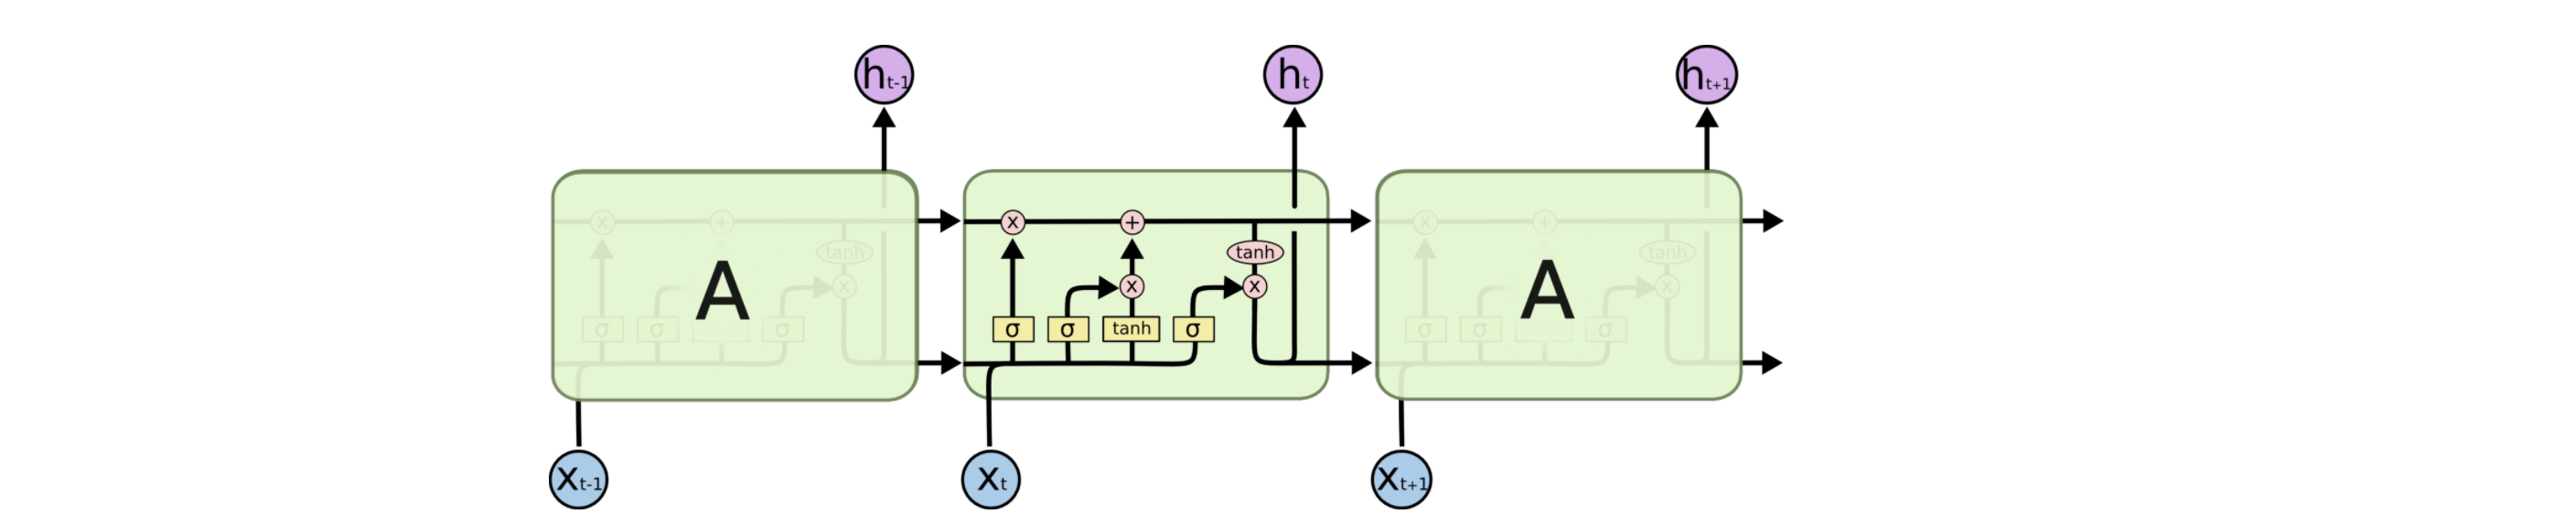


### 5.1.a.- Def difference

In [ ]:
"""
La función difference () a continuación diferenciará un conjunto de datos proporcionado 
con un desplazamiento proporcionado, llamado orden de diferencia, por ejemplo, 365 para un año de dias antes.
Podemos hacer que la diferencia ordene un hiperparámetro al modelo y solo realizar
la operación si se proporciona un valor distinto de cero.
"""

# Diferencia entre dataset
def difference(data, interval):
	return [data[i] - data[i - interval] for i in range(interval, len(data))]

### 5.1.b.- Def model_fit

In [ ]:
"""
La función model_fit () para adaptarse a un modelo LSTM se proporciona a continuación.
El modelo espera una lista de cinco hiperparámetros del modelo; Ellos son:
- n_input : el número de observaciones de retardo que se utilizarán como entrada del modelo.
- n_nodes : el número de unidades LSTM que se utilizarán en la capa oculta.
- n_epochs : la cantidad de veces que se expondrá el modelo a todo el conjunto de datos de entrenamiento.
- n_batch : el número de muestras dentro de una época después del cual se actualizan los pesos.
- n_diff : el orden de diferencia o 0 si no se utiliza.
"""

# Enreno un modelo
def model_fit(train, config):
	# Descomprimo la configuración
	n_input, n_nodes, n_epochs, n_batch, n_diff = config
	# Preparando la data
	if n_diff > 0: #Si el orden de diferenacia es mayor a 0:
		train = difference(train, n_diff)
	data = series_to_supervised(train, n_in=n_input)
	train_x, train_y = data[:, :-1], data[:, -1]
	train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
	# Defino el modelo
	model = Sequential()
	model.add(LSTM(n_nodes, activation='relu', input_shape=(n_input, 1)))
	model.add(Dense(n_nodes, activation='relu'))
	model.add(Dense(1))
	model.compile(loss='mse', optimizer='adam')
	# Entreno
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return model

Hacer una predicción con el modelo LSTM es lo mismo que hacer una predicción con un modelo CNN.

### 5.1.c.- Def model_predict

In [ ]:
"""
La función model_predict () a continuación implementa este comportamiento:
Una única entrada debe tener la estructura tridimensional de muestras, pasos de tiempo 
y características, que en este caso solo tenemos 1 muestra y 1 característica: [ 1, n_input , 1 ].
Si se realizó la operación de diferencia, debemos volver a sumar el valor que se restó después 
de que el modelo haya realizado un pronóstico. También debemos diferenciar los datos históricos 
antes de formular la entrada única utilizada para hacer una predicción.

"""

# Pronóstico con un modelo pre-ajustado
def model_predict(model, history, config):
	# Descomprimiendo la configuración
	n_input, _, _, _, n_diff = config
	# Preparando la data
	correction = 0.0
	if n_diff > 0:
		correction = history[-n_diff]
		history = difference(history, n_diff)
	x_input = array(history[-n_input:]).reshape((1, n_input, 1))
	# Prediciendo
	yhat = model.predict(x_input, verbose=0)
	return correction + yhat[0]

### 5.1.d.- Aplicando LSTM

Se realizará una búsqueda de cuadrícula simple de hiperparámetros del modelo y se eligió la siguiente configuración. Esta no es una configuración inicial, para ir testeando el modelo

La configuración elegida es la siguiente:
- n_input : 30 dias.
- n_nodos : 50
- n_epochs : 100
- n_batch : 100 (es decir, descenso de gradiente por lotes)
- n_diff : 12 (es decir, diferencia estacional)



In [ ]:
# Evaluando LSTM
from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot

In [ ]:

#data = series.values
# División de datos
#n_test = 30 #días
# Defino la configuración
#config = [36, 50, 100, 100, 12]
# Grid Search
#scores = repeat_evaluate(data, config, n_test)
# Resumir puntuaciones
#summarize_scores('lstm', scores)

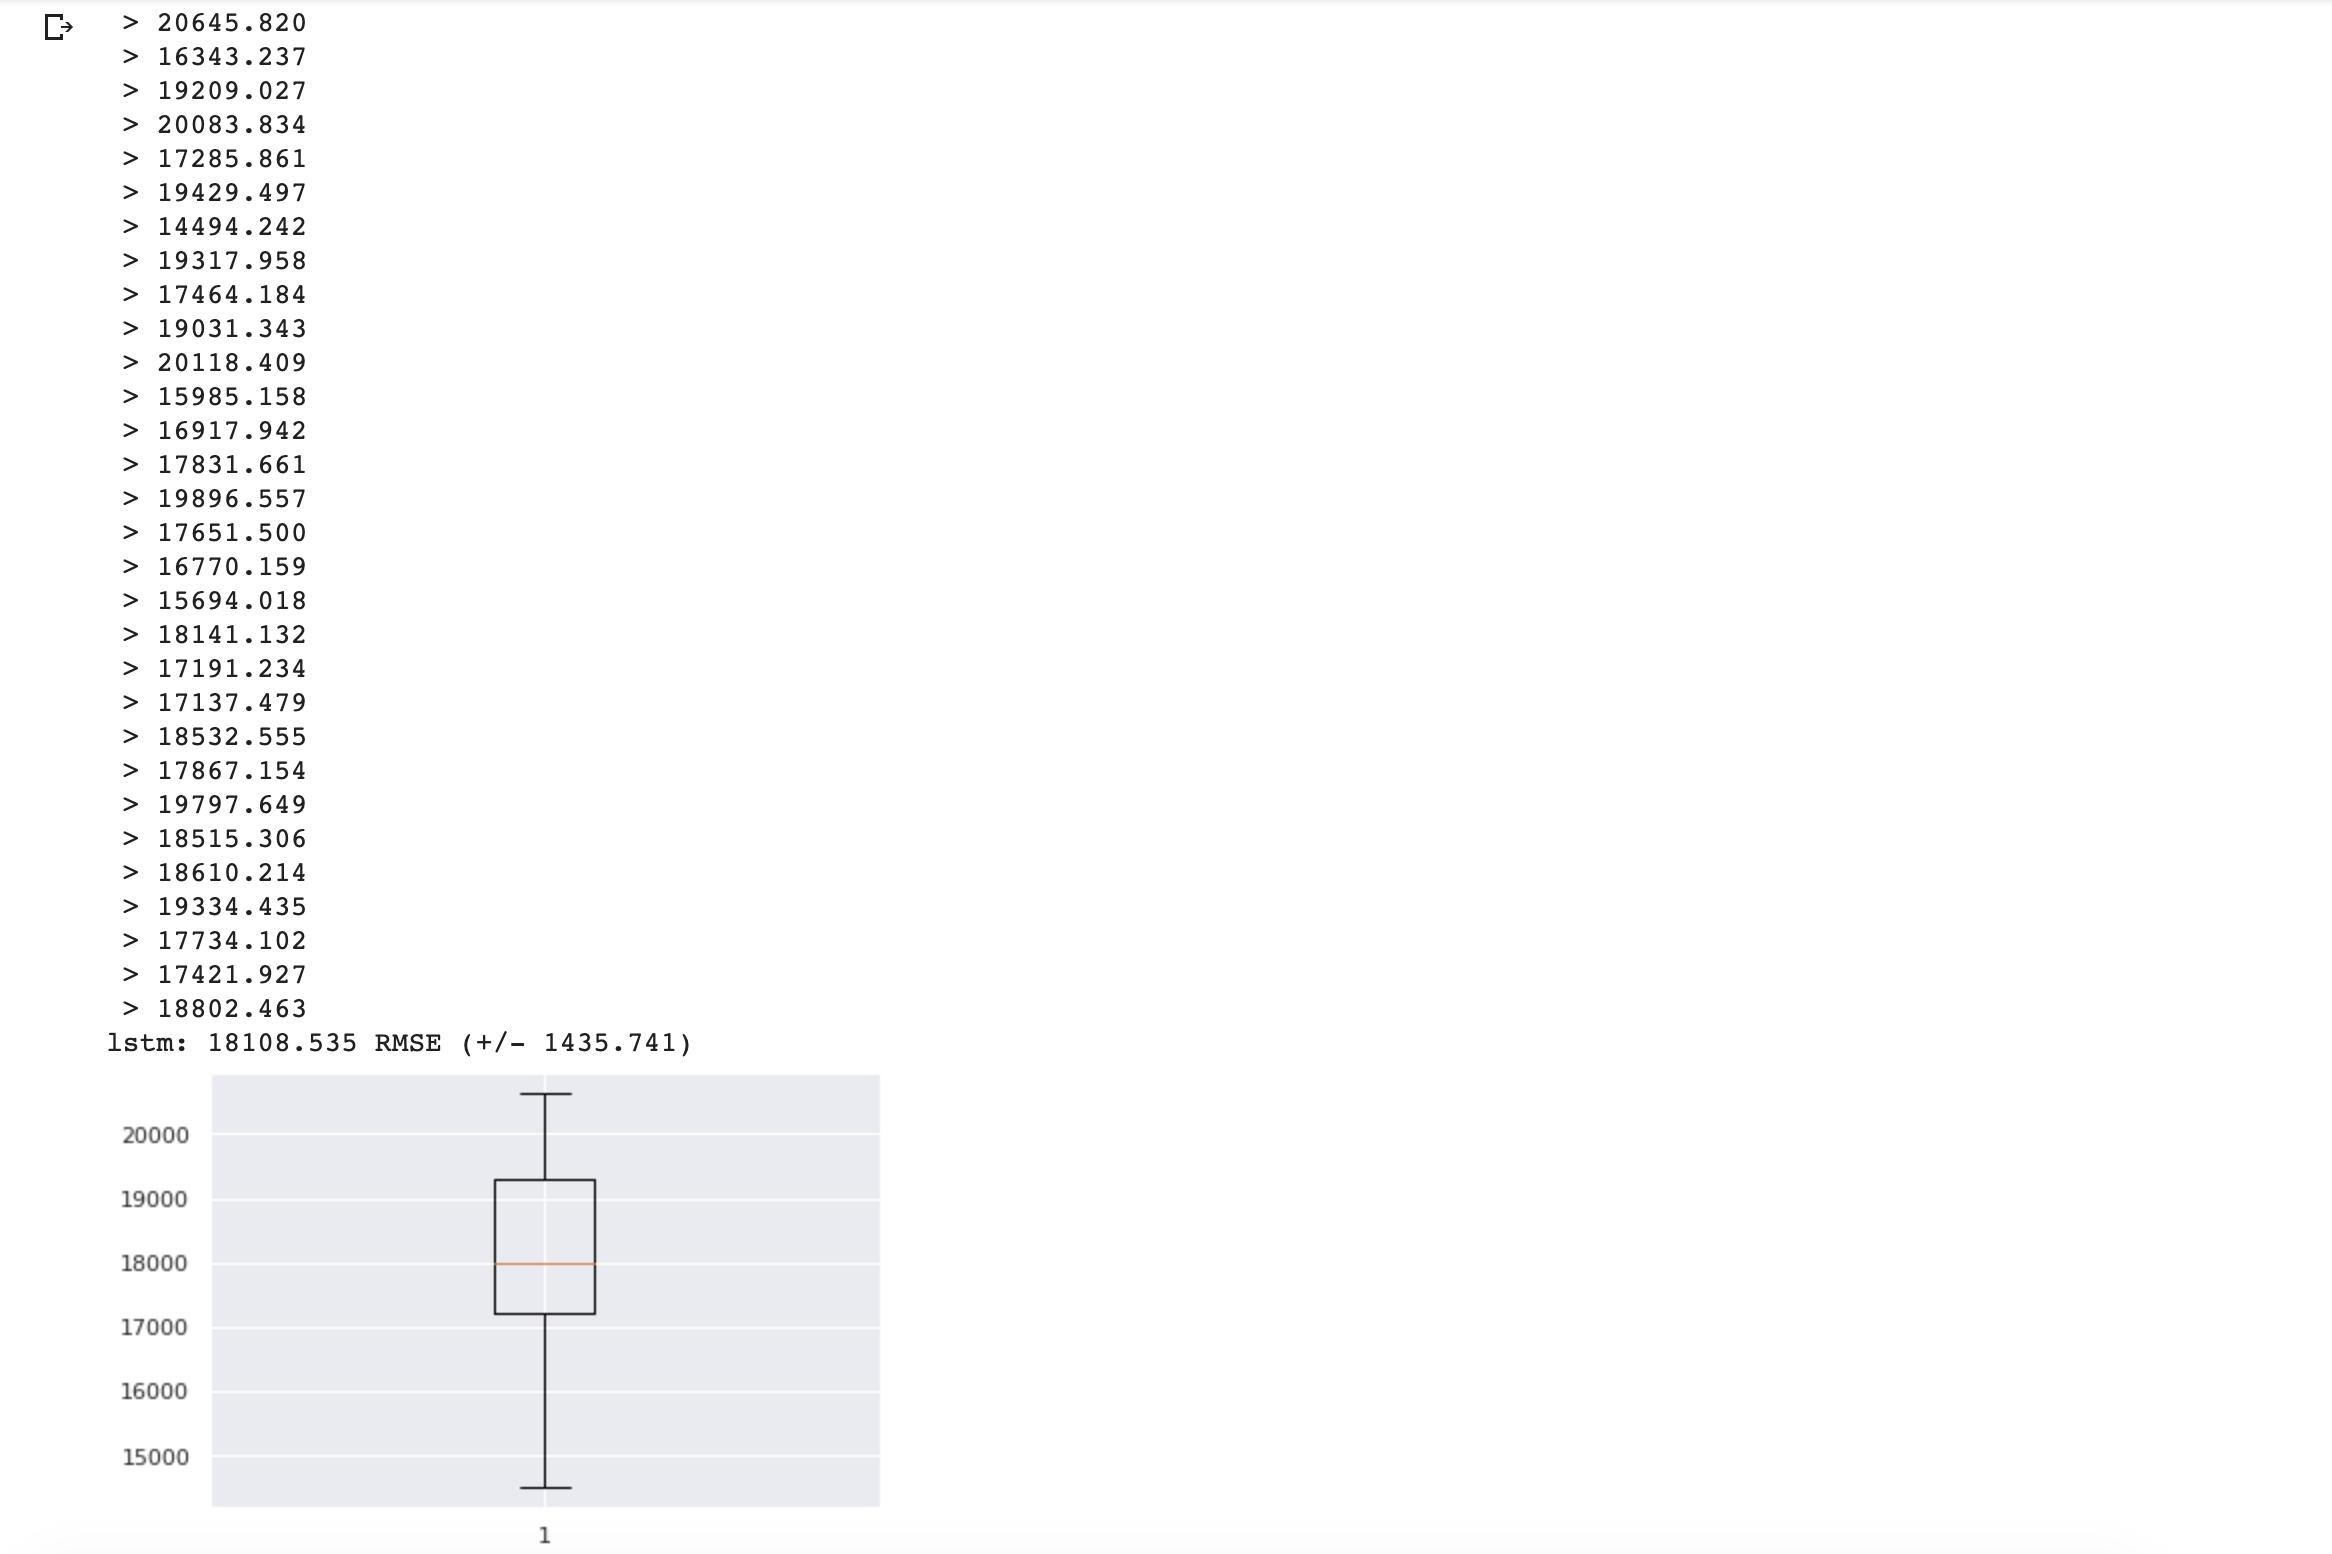

## 5.1.e.- Resultado

Al ejecutar, podemos ver el RMSE para cada evaluación del modelo.
Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación y las diferencias en la precisión numérica. Se debe ejecutar varias veces y comparar el resultado promedio.
Podemos ver que el RMSE promedio es de aproximadamente 18.108, que es peor que el modelo ingenuo. Esto sugiere que el modelo elegido no es hábil.
Esto proporciona evidencia adicional (aunque evidencia débil) de que los LSTM, al menos por sí solos, quizás no se adapten bien a los problemas de predicción de secuencias de tipo autorregresivo.



# 5.2.- CNN LSTM
Hemos visto que el modelo de CNN es capaz de aprender y extraer características automáticamente de los datos de secuencia sin procesar sin escalar ni diferenciar.

Podemos combinar esta capacidad con LSTM, donde se aplica un modelo CNN a subsecuencias de datos de entrada, cuyos resultados juntos forman una serie temporal de características extraídas que pueden ser interpretadas por un modelo LSTM.

Esta combinación de un modelo CNN utilizado para leer múltiples subsecuencias a lo largo del tiempo por un LSTM se denomina modelo CNN-LSTM.

El modelo requiere que cada secuencia de entrada, por ejemplo, 36 meses, se divida en múltiples subsecuencias, cada una leída por el modelo CNN, por ejemplo, 3 subsecuencias de 12 pasos de tiempo. Puede tener sentido dividir las subsecuencias por años, pero esto es solo una hipótesis, y se podrían usar otras divisiones, como seis subsecuencias de seis pasos de tiempo. Por lo tanto, esta división se parametriza con los parámetros n_seq y n_steps para el número de subsecuencias y el número de pasos por subsecuencia.

El número de observaciones de retraso por muestra es simplemente ( n_seq * n_steps ). Esta es una matriz de entrada de 4 dimensiones ahora con las dimensiones:

[samples, subsequences, timesteps, features]

Se debe aplicar el mismo modelo CNN a cada subsecuencia de entrada. Podemos lograr esto envolviendo todo el modelo de CNN en un contenedor de capa TimeDistributed .

La salida de una aplicación del submodelo CNN será un vector. La salida del submodelo a cada subsecuencia de entrada será una serie temporal de interpretaciones que pueden ser interpretadas por un modelo LSTM. Esto puede ir seguido de una capa completamente conectada para interpretar los resultados del LSTM y, finalmente, una capa de salida para hacer predicciones de un solo paso.

#### 5.2.a.- Def model_fit

In [ ]:
"""
El modelo espera una lista de siete hiperparámetros; ellos son:
n_seq : el número de subsecuencias dentro de una muestra.
n_steps : el número de pasos de tiempo dentro de cada subsecuencia.
n_filters : el número de filtros paralelos.
n_kernel : el número de pasos de tiempo considerados en cada lectura de la secuencia de entrada.
n_nodes : el número de unidades LSTM que se utilizarán en la capa oculta.
n_epochs : la cantidad de veces que se expondrá el modelo a todo el conjunto de datos de entrenamiento.
n_batch : el número de muestras dentro de una época después del cual se actualizan los pesos.
"""

# Entreno un modelo
def model_fit(train, config):
	# Descompongo la configuración
	n_seq, n_steps, n_filters, n_kernel, n_nodes, n_epochs, n_batch = config
	n_input = n_seq * n_steps
	# Preparo la data
	data = series_to_supervised(train, n_in=n_input)
	train_x, train_y = data[:, :-1], data[:, -1]
	train_x = train_x.reshape((train_x.shape[0], n_seq, n_steps, 1))
	# define model
	model = Sequential()
	model.add(TimeDistributed(Conv1D(filters=n_filters, kernel_size=n_kernel, activation='relu', input_shape=(None,n_steps,1))))
	model.add(TimeDistributed(Conv1D(filters=n_filters, kernel_size=n_kernel, activation='relu')))
	model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
	model.add(TimeDistributed(Flatten()))
	model.add(LSTM(n_nodes, activation='relu'))
	model.add(Dense(n_nodes, activation='relu'))
	model.add(Dense(1))
	model.compile(loss='mse', optimizer='adam')
	# fit
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return model

Hacer una predicción con el modelo de ajuste es muy similar a LSTM o CNN, aunque con la adición de dividir cada muestra en subsecuencias con un número determinado de pasos de tiempo.

#### 5.2.b.-Def model_predict

In [ ]:
"""
La función model_predict () actualizada se enumera a continuación.
"""
# Pronóstico con un modelo pre-ajustado
def model_predict(model, history, config):
	# unpack config
	n_seq, n_steps, _, _, _, _, _ = config
	n_input = n_seq * n_steps
	# prepare data
	x_input = array(history[-n_input:]).reshape((1, n_seq, n_steps, 1))
	# forecast
	yhat = model.predict(x_input, verbose=0)
	return yhat[0]

Se realizó una búsqueda de cuadrícula simple de hiperparámetros del modelo y se eligió la siguiente configuración. Puede que esta no sea una configuración óptima, pero es la mejor que se encontró.

- n_seq : 3
- n_steps : 14 (es decir, 14 días)
- n_filtros : 60
- n_kernel : 3
- n_nodos : 100
- n_epochs : 200
- n_batch : 100 (es decir, descenso de gradiente por lotes)
Podemos definir la configuración como una lista; por ejemplo:

In [ ]:
# Defino la configuración
config = [3, 14, 60, 3, 100, 200, 100]

#### 5.2.c.- Evaluando CNN LSTM
El ejemplo completo de evaluación del modelo CNN-LSTM para pronosticar los pasos de automóviles mensuales univariadas se enumera a continuación.

In [ ]:
# evaluate cnn lstm
from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from matplotlib import pyplot

In [ ]:
#data = series.values
# División de datos
#n_test = 14
# Defino la configuración
# Grid search
#scores = repeat_evaluate(data, config, n_test)
# Resumir puntuaciones
#summarize_scores('cnn-lstm', scores)

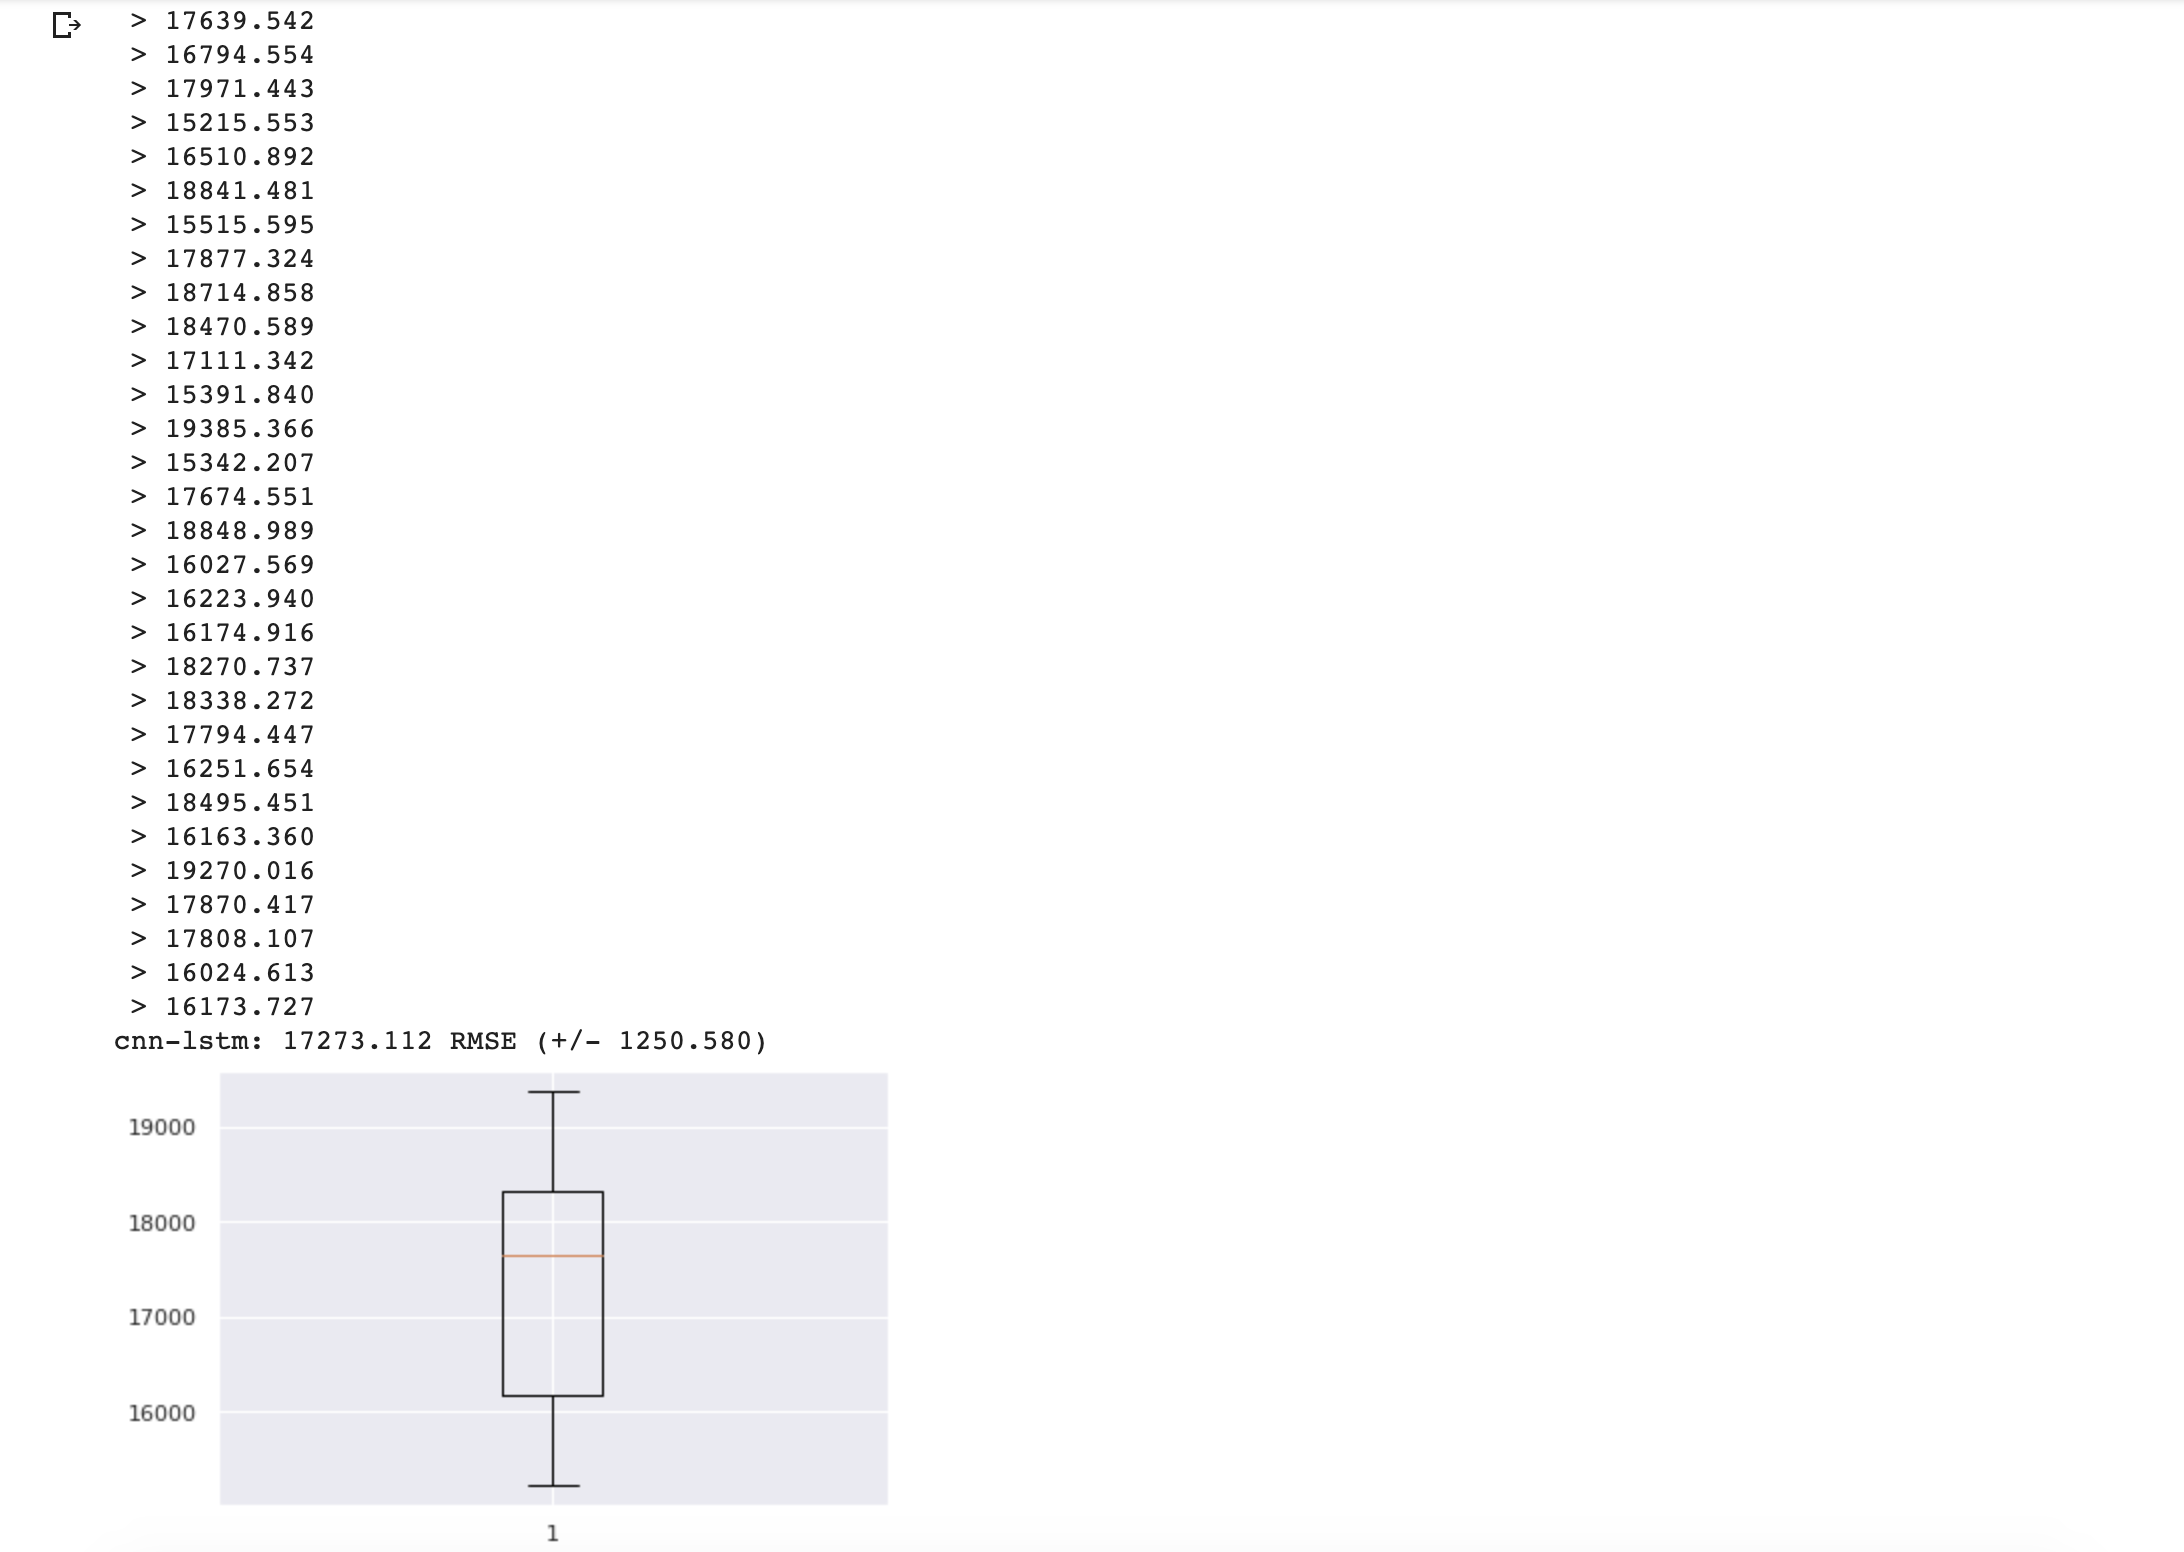

## 5.2.d.- Resultado

La ejecución del ejemplo imprime el RMSE para cada evaluación repetida del modelo.
Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o las diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y compare el resultado promedio.

El RMSE promedio final es de 17.273, que es más alto que el modelo ingenuo, lo que sugiere que la configuración elegida puede no ser tan estable como el modelo CNN independiente.

También se crea un diagrama de caja y bigotes que resume la distribución de las puntuaciones de RMSE.

El gráfico muestra un valor atípico de muy bajo rendimiento justo por sobre los 1250 pasos de vehiculos.





# 5.3.- CONVLSTM
Es posible realizar una operación convolucional como parte de la lectura de la secuencia de entrada dentro de cada unidad LSTM.
Esto significa que, en lugar de leer una secuencia paso a paso, el LSTM leería un bloque o subsecuencia de observaciones a la vez utilizando un proceso convolucional, como una CNN.
Esto es diferente a leer primero una extracción de características con un LSTM e interpretar el resultado con un LSTM; esto es realizar la operación CNN en cada paso de tiempo como parte del LSTM.
Este tipo de modelo se llama Convolutional LSTM o ConvLSTM para abreviar. Se proporciona en Keras como una capa llamada ConvLSTM2D para datos 2D. Podemos configurarlo para usarlo con datos de secuencia 1D asumiendo que tenemos una fila con múltiples columnas.
Al igual que con la CNN-LSTM, los datos de entrada se dividen en subsecuencias donde cada subsecuencia tiene un número fijo de pasos de tiempo, aunque también debemos especificar el número de filas en cada subsecuencia, que en este caso se fija en 1.
La forma es de cinco dimensiones, con las dimensiones:

[ samples , subsequences , rows , columns , features ]

In [ ]:
# evaluate convlstm
from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D
from matplotlib import pyplot

Al igual que la CNN, la capa ConvLSTM nos permite especificar el número de mapas de filtro y el tamaño del kernel utilizado al leer las secuencias de entrada.

#### 5.3.a.- Def model_fit

In [ ]:
"""
La salida de la capa es una secuencia de mapas de filtro que primero debe aplanarse antes de poder ser interpretada y seguida por una capa de salida.
El modelo espera una lista de siete hiperparámetros, lo mismo que el CNN-LSTM; ellos son:

- n_seq : el número de subsecuencias dentro de una muestra.
- n_steps : el número de pasos de tiempo dentro de cada subsecuencia.
- n_filters : el número de filtros paralelos.
- n_kernel : el número de pasos de tiempo considerados en cada lectura de la secuencia de entrada.
- n_nodes : el número de unidades LSTM que se utilizarán en la capa oculta.
- n_epochs : la cantidad de veces que se expondrá el modelo a todo el conjunto de datos de entrenamiento.
- n_batch : el número de muestras dentro de una época después del cual se actualizan los pesos.
"""

# Entreno un modelo
def model_fit(train, config):
	# Desempaquetar config
	n_seq, n_steps, n_filters, n_kernel, n_nodes, n_epochs, n_batch = config
	n_input = n_seq * n_steps
	# Preparar los datos
	data = series_to_supervised(train, n_in=n_input)
	train_x, train_y = data[:, :-1], data[:, -1]
	train_x = train_x.reshape((train_x.shape[0], n_seq, 1, n_steps, 1))
	# Definiendo el modelo
	model = Sequential()
	model.add(ConvLSTM2D(filters=n_filters, kernel_size=(1,n_kernel), activation='relu', input_shape=(n_seq, 1, n_steps, 1)))
	model.add(Flatten())
	model.add(Dense(n_nodes, activation='relu'))
	model.add(Dense(1))
	model.compile(loss='mse', optimizer='adam')
	# Entreno
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return model

Se hace una predicción con el modelo de ajuste de la misma manera que la CNN-LSTM, aunque con la dimensión de filas adicionales que fijamos a 1.

#### 5.3.b.- Def model_predict


In [ ]:
"""
La función model_predict () para realizar una predicción de un solo paso se enumera a continuación.
"""
# Pronóstico con un modelo pre-ajustado
def model_predict(model, history, config):
	# Desempaquetar config
	n_seq, n_steps, _, _, _, _, _ = config
	n_input = n_seq * n_steps
	# Preparando la data
	x_input = array(history[-n_input:]).reshape((1, n_seq, 1, n_steps, 1))
	# Pronóstico
	yhat = model.predict(x_input, verbose=0)
	return yhat[0]

Se realizó una búsqueda de cuadrícula simple de hiperparámetros del modelo y se eligió la siguiente configuración.

Puede que esta no sea una configuración óptima, pero es la mejor que se encontró.

- n_seq : 3 (es decir, 3 años)
- n_steps : 14
- n_filtros : 60
- n_kernel : 3
- n_nodos : 200
- n_epochs : 200
- n_batch : 100 (es decir, descenso de gradiente por lotes)

Podemos definir la configuración como una lista; por ejemplo:

In [ ]:
# Defino la config
config = [3, 14, 60, 3, 100, 200, 100]

#### 5.3.c.- Evaluando ConvLSTM

Podemos unir todo esto. La lista de códigos completa para el modelo ConvLSTM evaluado para el pronóstico de un paso del conjunto de datos de pasos mensuales de automóviles se enumera a continuación.

 > 18799.705
 > 19103.857
 > 21207.034
 > 19934.135
 > 19634.397
 > 17642.404
 > 18062.059
 > 19222.202
 > 18196.349
 > 17956.925
 > 18436.156
 > 18284.943
 > 19082.299
 > 19302.279
 > 21845.191
 > 19031.584
 > 20149.454
 > 22026.806
 > 19677.529
 > 18875.481
 > 18824.625
 > 18278.196
 > 18352.257
 > 19679.965
 > 18496.894
 > 17972.774
 > 21822.371
 > 18274.840
 > 19118.312
 > 18355.454
convlstm: 19188.216 RMSE (+/- 1173.089)


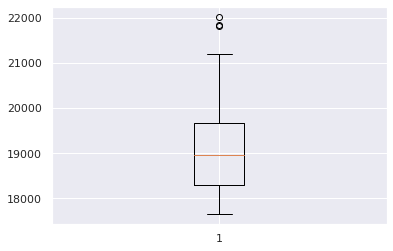

In [ ]:
from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D
from matplotlib import pyplot

#data = series.values
# División de Datos
#n_test = 12
# Defino la configuración
# Grid search
#scores = repeat_evaluate(data, config, n_test)
# Resumir puntuaciones
#summarize_scores('convlstm', scores)

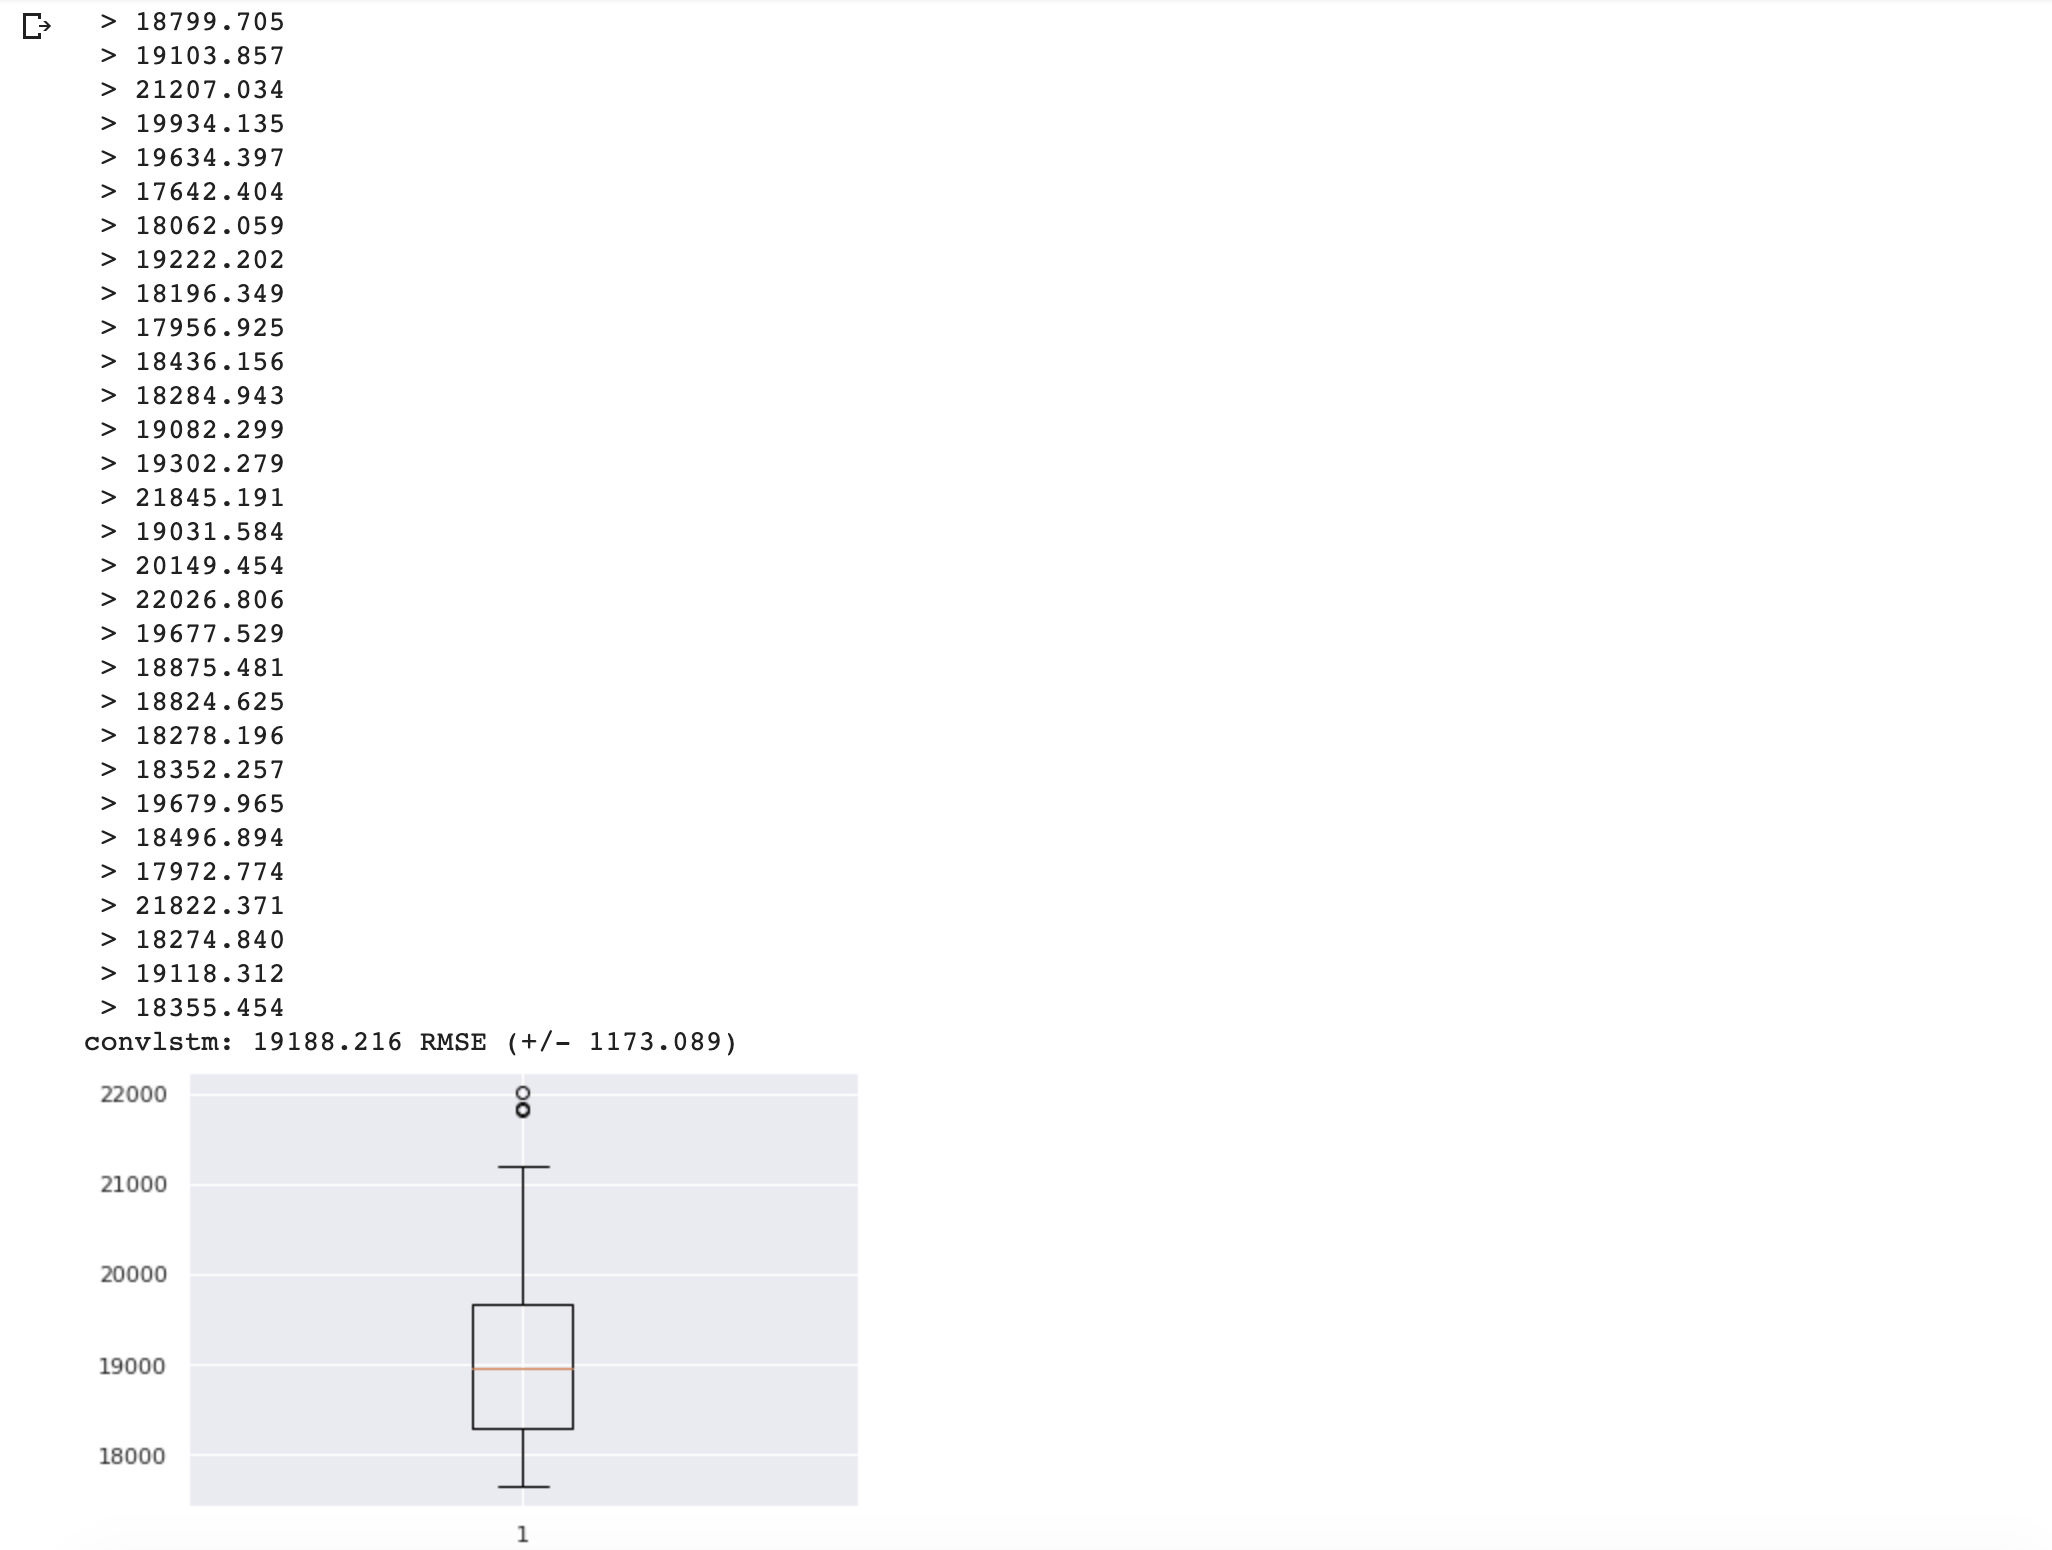

## 5.3.d.- Resultado 
La ejecución imprime el RMSE para cada evaluación repetida del modelo.
Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación.

El RMSE promedio final es 1173, que es más alto que el modelo ingenuo.
Es un resultado que quizás esté a la par con el modelo CNN-LSTM. La desviación estándar de esta puntuación también es muy grande, lo que sugiere que la configuración elegida puede no ser tan estable como el modelo CNN independiente.

También se crea un diagrama de caja y bigotes, que resume la distribución de las puntuaciones de RMSE.


# 6.- Elección del Modelo

Luego de testear los siguientes modelos:

- Test de Harness (modelo ingenuo)
- Modelo de Perceptrón Multicapa MLP´s
- Modelo de red Neuronal convolucional
- Modelos de redes Neuronales Recurrentes especificamente:
  - LSTM
  - CNN LSTM
  - CONV LSTM

In [ ]:
"""
Analizando 
"""

RedNeuronal = [
           ('Test de Harness (modelo ingenuo)', 12098, 0),
           ('Modelo de Perceptrón Multicapa MLP´s', 10036, 255),
           ("Modelo de red Neuronal convolucional", 14546, 456),
           ('Modelos de redes Neuronales Recurrentes LSTM', 18108, 1435),
           ('Modelos de redes Neuronales Recurrentes CNN LSTM',17273, 1250),
           ('Modelos de redes Neuronales Recurrentes CONV LSTM', 19188, 255)]

RedNeuronal = pd.DataFrame(data = RedNeuronal, columns=['RED NEURONAL A EVALUAR','MEAN(SCORES)','RMSE + / - '])
RedNeuronal

RED NEURONAL A EVALUAR  MEAN(SCORES)  RMSE + / - 
0                   Test de Harness (modelo ingenuo)         12098            0
1               Modelo de Perceptrón Multicapa MLP´s         10036          255
2               Modelo de red Neuronal convolucional         14546          456
3       Modelos de redes Neuronales Recurrentes LSTM         18108         1435
4   Modelos de redes Neuronales Recurrentes CNN LSTM         17273         1250
5  Modelos de redes Neuronales Recurrentes CONV LSTM         19188          255

Arroja que el modelo con mejores resultados es el de perceptrón Multicapa MLP`S por lo que será con el que procederé a realizar la predicción final.

# 7.- MODELO FINAL: Predicción de tráfico con perceptrón multicapa

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import keras
import math
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline

In [ ]:
data = series.values
df1 = pd.DataFrame(data)
df1

0
0      45478.0
1      89289.0
2      92602.0
3      95813.0
4     100044.0
...        ...
1456   39616.0
1457   71737.0
1458   79839.0
1459   77442.0
1460   44574.0

[1461 rows x 1 columns]

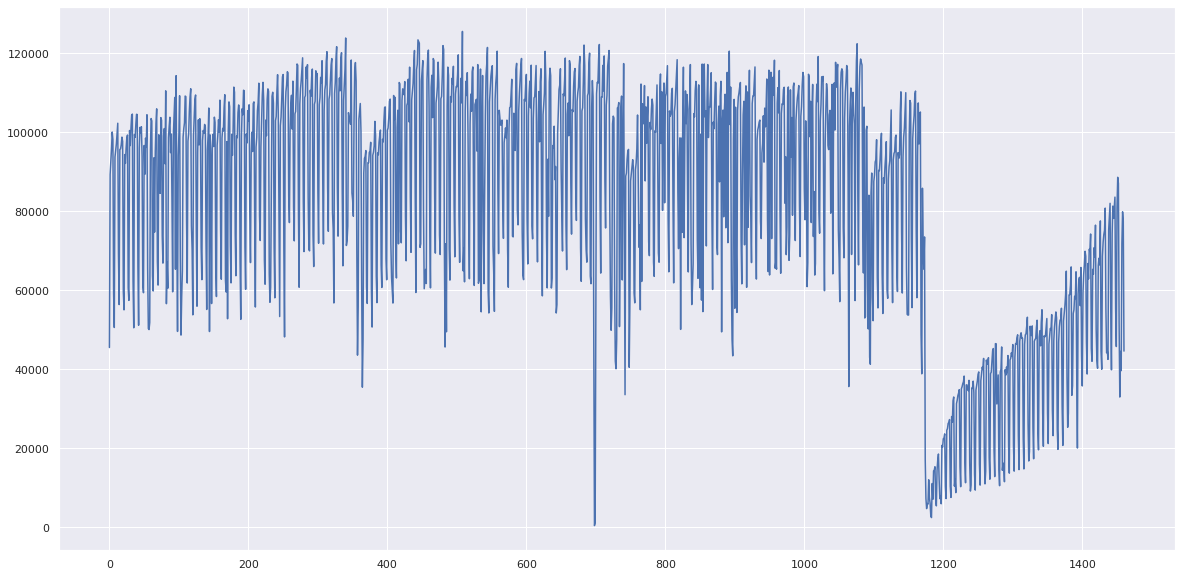

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df1)
plt.show()

In [ ]:
# Reshaping el conjunto de datos con el tamaño de la ventana = 288
def create_dataset(dataset, window=1):
    dataX, dataY= [], []
    for i in range(len(dataset)-window-1):
        a = dataset[i:(i+window),0]
        dataX.append(a)
        dataY.append(dataset[i+window,0])
    return np.array(dataX), np.array(dataY)


# Escalado de funciones para facilitar el cálculo
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))


In [ ]:
# Train test split (80% train, 20% test)
training_size = int(len(df1)*0.80)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

window = 30
X_train,y_train = create_dataset(train_data,window)
X_test, y_test = create_dataset(test_data,window)



## 7.1.- Modelo de perceptrón multicapa Editar
Este es el modelo exacto utilizado en el artículo de investigación mencionado anteriormente. Solo para evitar el sobreajuste, cambié el número de épocas de 2000 a 100. Probé con 2000 épocas, causa sobreajuste, por lo tanto, proporciona una mala puntuación de prueba.

Anteriormente el modelo con mejor resultado fue el :
El mejor modelo fue el de los siguientes parametros:

- n_test = 90
- n_input : 30 (por ejemplo, 30 dias)
- n_nodos : 500
- n_epochs : 100
- n_lote : 100 
- Configuración: config = [14, 30, 90, 120]
- Grid search: scores = repeat_evaluate(data, config, n_test)
- Oteniendo un nlp 10.036 y RMSE ( + / - 521 )




In [ ]:
"""

# Traigo la función anterior 
def model_fit(train, config):
	# Desempaquetar la config
	n_input, n_nodes, n_epochs, n_batch = config
	# Preparar la data
	data = series_to_supervised(train, n_in=n_input)
	train_x, train_y = data[:, :-1], data[:, -1]
	# Defino el modelo
	model = Sequential()
	model.add(Dense(n_nodes, activation='relu', input_dim=n_input))
	model.add(Dense(1))
	model.compile(loss='mse', optimizer='adam')
	# Entreno
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return model
  """

"\n\n# Traigo la función anterior \ndef model_fit(train, config):\n\t# Desempaquetar la config\n\tn_input, n_nodes, n_epochs, n_batch = config\n\t# Preparar la data\n\tdata = series_to_supervised(train, n_in=n_input)\n\ttrain_x, train_y = data[:, :-1], data[:, -1]\n\t# Defino el modelo\n\tmodel = Sequential()\n\tmodel.add(Dense(n_nodes, activation='relu', input_dim=n_input))\n\tmodel.add(Dense(1))\n\tmodel.compile(loss='mse', optimizer='adam')\n\t# Entreno\n\tmodel.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)\n\treturn model\n  "

In [ ]:
model = Sequential()
model.add(Dense(500, input_dim=window, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(1))

In [ ]:
opt  = keras.optimizers.Adagrad(learning_rate = 0.05)

In [ ]:
model.compile(optimizer=opt ,loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential_100"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_176 (Dense)            (None, 500)               15500     
_________________________________________________________________
dense_177 (Dense)            (None, 500)               250500    
_________________________________________________________________
dense_178 (Dense)            (None, 500)               250500    
_________________________________________________________________
dense_179 (Dense)            (None, 1)                 501       
Total params: 517,001
Trainable params: 517,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=100, verbose=0)

## 7.2.- Predecir el tráfico futuro

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
train_predict = train_predict.astype(int)
test_predict = test_predict.astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

## 7.3.- Medidas de precisión

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('RMSE-train:',math.sqrt(mean_squared_error(y_train,train_predict)))
print('MAE-train:',mean_absolute_error(y_train,train_predict))
print('R_2-train:',r2_score(y_train,train_predict))

RMSE-train: 17721.29577203455
MAE-train: 15211.321020228672
R_2-train: 0.28585586294200904


In [ ]:
print('RMSE-test:',math.sqrt(mean_squared_error(y_test,test_predict)))
print('MAE-test:',mean_absolute_error(y_test,test_predict))
print('R_2-test:',r2_score(y_test,test_predict))

RMSE-test: 13313.898042850555
MAE-test: 10904.515267175573
R_2-test: 0.5036662378991001


## 7.4.- Visualización
La línea azul es el conjunto de datos real, el naranja es el entrenamiento y el verde son los resultados de la prueba.

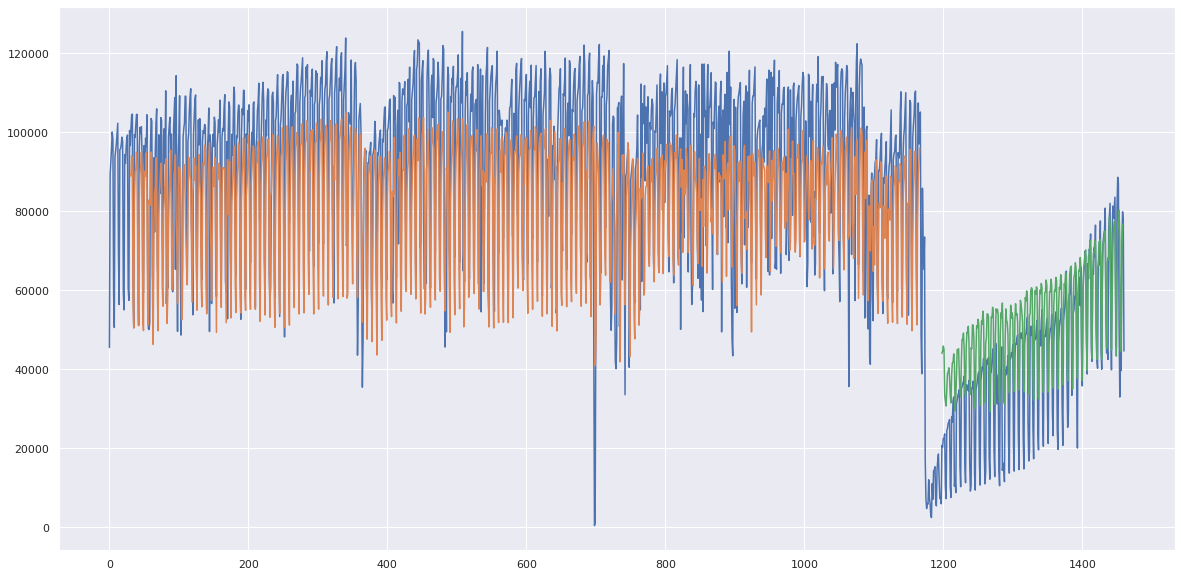

In [ ]:
# Predicciones de Train 
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[window:len(train_predict)+window, :] = train_predict
# Predicciones de Train para graficar
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(window*2)+1:len(df1)-1, :] = test_predict
# Trazar la línea de base y las predicciones
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## 7.5.- Conclusión
Aquí, con un perceptrón multicapa simple, obtuvimos un puntaje R cuadrado de 50% de precisión en la prueba. Este resultado se puede mejorar con un ajuste adecuado de Hiper parametros. Como el conjunto de datos no tiene una dependencia de largo plazo  RNN como LSTM, GRU, ConvLSTM no funcionaron optimamente. Como los datos de tráfico son estacionales todos los días, la dependencia a largo plazo es menor, por lo que los perceptrones multicapa (o ANN simple) funcionaron bien.


## 7.6.- Extensiones
Esta sección enumera algunas ideas para mejorar.

1.- Preparación de datos : Explorar si la preparación de datos, como la normalización, la estandarización y / o la diferenciación, pueden mejorar el rendimiento de cualquiera de los modelos.

2.- Hiperparámetros de búsqueda de cuadrícula : Implementar una búsqueda de cuadrícula de los hiperparámetros para intentar mejorar el rendimiento.

3.- Diagnóstico de la curva de aprendizaje : Crear un ajuste único de un modelo y revisar las curvas de aprendizaje en el train y test, luego utilizar los diagnósticos de las curvas de aprendizaje para ajustar los hiperparámetros del modelo con el fin de mejorar el rendimiento del mismo.

4.- Tamaño de la historia : Explorar diferentes cantidades de datos históricos aplicando distintas unidades de medida de tiempo tales como años, meses, semanas(entradas de retraso).

5.- Reducir la varianza del modelo final : Explorar estrategias para reducir la varianza del modelo de red neuronal.

6.- Actualización durante Walk-Forward : Explorar reajustar o actualizar un modelo de red neuronal como parte de la validación de avance y testear si puede mejorar el rendimiento del modelo.

7.- Más parametrización : Explore la posibilidad de agregar más parámetros al modelo, como el uso de capas adicionales.